In [1]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
from shapely import wkt
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
normalized_filtered_combined_age_groups_no_outliner.csv"

In [ ]:
import pandas as pd

# Load full dataset and matched outlier rows
full_path = "/content/drive/MyDrive/traffic data/social status merge/normalized_by_population_per_1000.csv"
outlier_path = "/content/drive/MyDrive/traffic data/social status merge/OLS_outliers_matched_rows.csv"

df_full = pd.read_csv(full_path)
df_outliers = pd.read_csv(outlier_path)

# Match and remove rows using 'tract' column (you can change this to 'case_id' if needed)
key_column = 'tract'

# Ensure the key exists in both datasets
assert key_column in df_full.columns, f"'{key_column}' not in full dataset"
assert key_column in df_outliers.columns, f"'{key_column}' not in outlier list"

# Remove outliers
df_clean = df_full[~df_full[key_column].isin(df_outliers[key_column])]

# Save cleaned dataset
output_path = "/content/drive/MyDrive/traffic data/social status merge/normalized_without_outliers.csv"
df_clean.to_csv(output_path, index=False)

print(f"✅ Cleaned dataset saved to:\n{output_path}")
print(f"🗑️ Removed {len(df_outliers)} outlier rows based on '{key_column}' match.")


✅ Cleaned dataset saved to:
/content/drive/MyDrive/traffic data/social status merge/normalized_without_outliers.csv
🗑️ Removed 8 outlier rows based on 'tract' match.


In [3]:
import pandas as pd

# Load the original CSV
input_path =  "/content/drive/MyDrive/traffic data/social status merge/normalized_without_outliers.csv"
df = pd.read_csv(input_path)

# List of columns to keep
columns_to_keep = [
    'population', 'tract_centroid_x', 'tract_centroid_y',
    '10 to 14_per_1000', '15 to 17_per_1000', '18 and 19_per_1000', '20 to 24_per_1000',
    '25 to 29_per_1000', '30 to 34_per_1000', '35 to 39_per_1000', '40 to 44_per_1000',
    '45 to 49_per_1000', '5 to 9_per_1000', '50 to 54_per_1000', '55 to 59_per_1000',
    '60 and 61_per_1000', '62 to 64_per_1000', '65 to 69_per_1000', '70 to 74_per_1000',
    '75 to 79_per_1000', '80 to 84_per_1000', '85 and Older_per_1000',
    'Under 5_per_1000', '$100,000 to $124,999_per_1000', '$125,000 to $149,999_per_1000',
    '$15,000 to $29,999_per_1000', '$150,000 to $199,999_per_1000',
    '$200,000 or more_per_1000', '$30,000 to $44,999_per_1000',
    '$45,000 to $59,999_per_1000', '$60,000 to $74,999_per_1000',
    '$75,000 to $99,999_per_1000', 'Less than $15,000_per_1000',
    'Hispanic_per_1000', 'Non-Hispanic, Asian_per_1000',
    'Non-Hispanic, Black_per_1000', 'Non-Hispanic, White_per_1000',
    'Other_per_1000', 'total_accidents_per_1000', 'Client Count_per_1000'
]

# Filter and save
df_filtered = df[columns_to_keep]
output_path = "/content/drive/MyDrive/traffic data/social status merge/normalized_filtered_on_outliner.csv"
df_filtered.to_csv(output_path, index=False)

print("✅ Filtered CSV with selected columns saved to:")
print(output_path)


✅ Filtered CSV with selected columns saved to:
/content/drive/MyDrive/traffic data/social status merge/normalized_filtered_on_outliner.csv


In [ ]:
import pandas as pd

# Load the original CSV
csv_path = "/content/drive/MyDrive/traffic data/social status merge/normalized_filtered_on_outliner.csv"
df = pd.read_csv(csv_path)

# Columns for 65 and above
seniors_cols = [
    '65 to 69_per_1000', '70 to 74_per_1000', '75 to 79_per_1000',
    '80 to 84_per_1000', '85 and Older_per_1000'
]

# Columns for adults 25–64
adults_cols = [
    '25 to 29_per_1000', '30 to 34_per_1000', '35 to 39_per_1000',
    '40 to 44_per_1000', '45 to 49_per_1000', '50 to 54_per_1000',
    '55 to 59_per_1000', '60 and 61_per_1000', '62 to 64_per_1000'
]

# Columns for kids under 15
kids_cols = [
    'Under 5_per_1000', '5 to 9_per_1000', '10 to 14_per_1000'
]

# Columns for teens and young adults 15–24
teens_young_adults_cols = [
    '15 to 17_per_1000', '18 and 19_per_1000', '20 to 24_per_1000'
]

# Combine all columns that will be removed after grouping
all_age_columns = seniors_cols + adults_cols + kids_cols + teens_young_adults_cols

# Check that all required columns exist
missing_cols = [col for col in all_age_columns if col not in df.columns]
if missing_cols:
    raise ValueError(f"Missing columns: {missing_cols}")

# Create grouped columns
df['65_and_above_per_1000'] = df[seniors_cols].sum(axis=1)
df['adults_25_64_per_1000'] = df[adults_cols].sum(axis=1)
df['kids_under_15_per_1000'] = df[kids_cols].sum(axis=1)
df['teens_young_adults_15_24_per_1000'] = df[teens_young_adults_cols].sum(axis=1)

# Drop original age columns
df.drop(columns=all_age_columns, inplace=True)

# Save the updated CSV with the same name
output_path = "/content/drive/MyDrive/traffic data/social status merge/normalized_filtered_combined_age_groups_no_outliner.csv"
df.to_csv(output_path, index=False)

print("✅ Updated CSV with all combined age groups saved to:")
print(output_path)

✅ Updated CSV with all combined age groups saved to:
/content/drive/MyDrive/traffic data/social status merge/normalized_filtered_combined_age_groups_no_outliner.csv


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Load the cleaned CSV
csv_path = "/content/drive/MyDrive/traffic data/social status merge/normalized_filtered_combined_age_groups_final.csv"
df = pd.read_csv(csv_path)

# Select numeric columns only
X = df.select_dtypes(include='number').copy()

# Clean: replace inf with NaN, then drop rows with any NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.dropna(inplace=True)

# Add constant for VIF calculation
X_const = add_constant(X)

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i + 1) for i in range(X.shape[1])]

# Sort and display top VIFs
vif_sorted = vif_data.sort_values(by="VIF", ascending=False)
print("✅ Top variables with highest VIF:")
print(vif_sorted.head)

# Save full VIF table
output_path = "/content/drive/MyDrive/traffic data/social status merge/vif_filtered_final.csv"
vif_sorted.to_csv(output_path, index=False)

print("✅ Full VIF table saved to:")
print(output_path)


✅ Top variables with highest VIF:
<bound method NDFrame.head of                              Variable       VIF
15           total_accidents_per_1000  7.312624
13                  Hispanic_per_1000  6.953218
18  teens_young_adults_15_24_per_1000  3.197254
14       Non-Hispanic, Asian_per_1000  2.837802
17             kids_under_15_per_1000  2.561848
5         $15,000 to $29,999_per_1000  1.891666
7           $200,000 or more_per_1000  1.779562
6       $150,000 to $199,999_per_1000  1.675151
16              Client Count_per_1000  1.640045
10        $60,000 to $74,999_per_1000  1.567119
12         Less than $15,000_per_1000  1.539500
9         $45,000 to $59,999_per_1000  1.517989
8         $30,000 to $44,999_per_1000  1.488621
1                    tract_centroid_x  1.356158
4       $125,000 to $149,999_per_1000  1.341022
11        $75,000 to $99,999_per_1000  1.308180
2                    tract_centroid_y  1.300847
3       $100,000 to $124,999_per_1000  1.261859
0                       

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset
csv_path = "/content/drive/MyDrive/traffic data/social status merge/normalized_filtered_combined_age_groups_no_outliner.csv"
df = pd.read_csv(csv_path)

# Define target and selected features
target = "total_accidents_per_1000"
features_to_keep = [
    "Hispanic_per_1000",
    "teens_young_adults_15_24_per_1000",
    "Non-Hispanic, Asian_per_1000",
    "kids_under_15_per_1000",
    "$15,000 to $29,999_per_1000",
    "Client Count_per_1000",
    "Less than $15,000_per_1000",
    "$45,000 to $59,999_per_1000",
    "tract_centroid_x",
    "tract_centroid_y",
    "population"
]

# Filter and drop missing values
df_filtered = df[features_to_keep + [target]].dropna()
X = df_filtered[features_to_keep]
y = df_filtered[target]

# Initialize model
model = LinearRegression()

# Set up 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute R²
r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

# Compute RMSE
rmse_scores = np.sqrt(-cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error'))

# Output results
print("✅ OLS Cross-Validation Results (5-Fold):")
print(f"Average R²: {r2_scores.mean():.4f}")
print(f"R² Scores: {r2_scores}")
print(f"Average RMSE: {rmse_scores.mean():.4f}")
print(f"RMSE Scores: {rmse_scores}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ OLS Cross-Validation Results (5-Fold):
Average R²: 0.6302
R² Scores: [0.52533932 0.55622257 0.5587538  0.5198598  0.99063302]
Average RMSE: 3.4333
RMSE Scores: [2.93103976 3.90728758 3.28173696 4.38443543 2.66198106]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# Load the cleaned dataset
csv_path = "/content/drive/MyDrive/traffic data/social status merge/normalized_filtered_combined_age_groups_no_outliner.csv"
df = pd.read_csv(csv_path)

# Define target and features
target = "total_accidents_per_1000"
features_to_keep = [
    "Hispanic_per_1000",
    "teens_young_adults_15_24_per_1000",
    "Non-Hispanic, Asian_per_1000",
    "kids_under_15_per_1000",
    "$15,000 to $29,999_per_1000",
    "Client Count_per_1000",
    "Less than $15,000_per_1000",
    "$45,000 to $59,999_per_1000",
    "tract_centroid_x",
    "tract_centroid_y",
    "population"
]

df_filtered = df[features_to_keep + [target]].dropna().copy()
X = df_filtered[features_to_keep].values
y = df_filtered[target].values

# Track errors per row
row_errors = pd.DataFrame(index=df_filtered.index, columns=["actual", "predicted", "residual", "fold"])
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = LinearRegression()

for fold, (train_index, test_index) in enumerate(kf.split(X), start=1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    for i, idx in enumerate(test_index):
        row_errors.loc[df_filtered.index[idx], "actual"] = y_test[i]
        row_errors.loc[df_filtered.index[idx], "predicted"] = y_pred[i]
        row_errors.loc[df_filtered.index[idx], "residual"] = y_test[i] - y_pred[i]
        row_errors.loc[df_filtered.index[idx], "fold"] = fold

row_errors["abs_residual"] = row_errors["residual"].abs()
row_errors = row_errors.astype({"actual": float, "predicted": float, "residual": float, "abs_residual": float})

# Sort by largest residual to find outliers
outlier_rows = row_errors.sort_values(by="abs_residual", ascending=False).head(10)

# Show the worst offending rows
print("🔍 Top 10 rows with the largest residuals (likely outliers):")
display(outlier_rows)


🔍 Top 10 rows with the largest residuals (likely outliers):


,actual,predicted,residual,fold,abs_residual
113,111.111111,1414.001989,-1302.890878,3,1302.890878
274,333.333333,418.066195,-84.732862,3,84.732862
234,58.823529,13.497173,45.326357,1,45.326357
110,31.927711,11.919967,20.007743,2,20.007743
551,25.974026,7.112246,18.861780,4,18.861780
115,31.778575,13.515892,18.262683,4,18.262683
427,20.085363,4.523427,15.561936,5,15.561936
5,25.517056,10.245207,15.271849,3,15.271849
681,25.042301,10.032207,15.010094,5,15.010094
424,19.499788,4.801693,14.698095,1,14.698095


In [ ]:
import pandas as pd

# File path
outlier_path = "/content/drive/MyDrive/traffic data/social status merge/OLS_outliers_matched_rows.csv"

# Load the CSV
df_outliers = pd.read_csv(outlier_path)

# Define values to add
target_tract = 55.0
predicted_value = 1414.001989
residual_value = -1302.890878

# Update the row where tract == 55.0
mask = df_outliers["tract"] == target_tract
if mask.any():
    df_outliers.loc[mask, "predicted"] = predicted_value
    df_outliers.loc[mask, "residual"] = residual_value
    df_outliers.to_csv(outlier_path, index=False)
    print("✅ Updated 'tract == 55.0' with predicted and residual values.")
    display(df_outliers.loc[mask])
else:
    print("⚠️ Row with tract == 55.0 not found in the CSV.")


✅ Updated 'tract == 55.0' with predicted and residual values.


,tract,yr_id,10 to 14,15 to 17,18 and 19,20 to 24,25 to 29,30 to 34,35 to 39,40 to 44,...,Hispanic_per_1000,"Non-Hispanic, Asian_per_1000","Non-Hispanic, Black_per_1000","Non-Hispanic, White_per_1000",Other_per_1000,total_accidents_per_1000,Client Count_per_1000,predicted,residual,z_score
7,55.0,2020,5.0,9.0,63.0,231.0,54.0,11.0,0.0,1.0,...,2722.222222,583.333333,1972.222222,5194.444444,361.111111,111.111111,4138.888889,1414.001989,-1302.890878,NaN


In [ ]:
# Load the full original dataset again
original_df = pd.read_csv(csv_path)

# Merge top outlier rows with original data using index
outlier_details = original_df.loc[outlier_rows.index].copy()

# Add residual details
outlier_details["actual"] = row_errors.loc[outlier_rows.index, "actual"]
outlier_details["predicted"] = row_errors.loc[outlier_rows.index, "predicted"]
outlier_details["residual"] = row_errors.loc[outlier_rows.index, "residual"]
outlier_details["abs_residual"] = row_errors.loc[outlier_rows.index, "abs_residual"]
outlier_details["fold"] = row_errors.loc[outlier_rows.index, "fold"]

# Display full original data for outlier rows with errors
print("🔍 Full original rows corresponding to the largest prediction errors:")
display(outlier_details)


🔍 Full original rows corresponding to the largest prediction errors:


,population,tract_centroid_x,tract_centroid_y,"$100,000 to $124,999_per_1000","$125,000 to $149,999_per_1000","$15,000 to $29,999_per_1000","$150,000 to $199,999_per_1000","$200,000 or more_per_1000","$30,000 to $44,999_per_1000","$45,000 to $59,999_per_1000",...,"Non-Hispanic, Asian_per_1000",total_accidents_per_1000,Client Count_per_1000,kids_under_15_per_1000,teens_young_adults_15_24_per_1000,actual,predicted,residual,abs_residual,fold
113,36,-117.146804,32.724133,27.777778,27.777778,27.777778,27.777778,83.333333,27.777778,27.777778,...,583.333333,111.111111,4138.888889,444.444444,8416.666667,111.111111,1414.001989,-1302.890878,1302.890878,3
274,15,-116.958797,32.579675,0.000000,0.000000,0.000000,0.000000,200.000000,0.000000,0.000000,...,2933.333333,333.333333,0.000000,866.666667,12333.333333,333.333333,418.066195,-84.732862,84.732862,3
234,136,-117.190830,32.772426,0.000000,102.941176,0.000000,0.000000,88.235294,0.000000,0.000000,...,8191.176471,58.823529,7.352941,176.470588,19970.588235,58.823529,13.497173,45.326357,45.326357,1
110,1660,-117.158341,32.708794,45.783133,0.000000,118.072289,93.373494,275.903614,61.445783,13.253012,...,90.361446,31.927711,19.277108,36.144578,46.385542,31.927711,11.919967,20.007743,20.007743,2
551,924,-117.387932,33.196804,91.991342,16.233766,46.536797,50.865801,88.744589,114.718615,81.168831,...,33.549784,25.974026,14.069264,75.757576,74.675325,25.974026,7.112246,18.861780,18.861780,4
115,1951,-117.146537,32.730768,25.627883,39.466940,65.094823,96.873398,43.054844,61.506920,115.838032,...,110.199897,31.778575,70.220400,75.345976,96.360841,31.778575,13.515892,18.262683,18.262683,4
427,3983,-116.971155,32.814961,35.400452,0.000000,54.983681,11.046950,8.285212,28.370575,49.209139,...,50.213407,20.085363,14.561888,191.062014,142.606076,20.085363,4.523427,15.561936,15.561936,5
5,3723,-117.163070,32.753338,59.092130,26.322858,42.707494,60.972334,62.583938,77.356970,76.282568,...,106.097233,25.517056,13.430030,48.079506,70.641955,25.517056,10.245207,15.271849,15.271849,3
681,2955,-117.111850,33.117972,25.380711,14.213198,58.544839,51.776650,45.008460,26.057530,64.636210,...,82.571912,25.042301,52.453469,150.592217,107.952623,25.042301,10.032207,15.010094,15.010094,5
424,2359,-116.980543,32.788626,25.858415,40.695210,46.629928,47.477745,53.836371,50.869012,46.206019,...,34.760492,19.499788,2.967359,209.410767,133.531157,19.499788,4.801693,14.698095,14.698095,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_const, y, test_size=0.2, random_state=42)

# Fit on training set
model = sm.OLS(y_train, X_train).fit()

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("✅ OLS Test Performance:")
print(f"R² on test set: {r2:.4f}")
print(f"RMSE on test set: {rmse:.4f}")

# Optional: still print the model summary (on training fit)
print("\n🔍 OLS Training Summary:")
print(model.summary())


✅ OLS Test Performance:
R² on test set: 0.2955
RMSE on test set: 5.1221

🔍 OLS Training Summary:
                               OLS Regression Results                               
Dep. Variable:     total_accidents_per_1000   R-squared:                       0.880
Model:                                  OLS   Adj. R-squared:                  0.878
Method:                       Least Squares   F-statistic:                     384.1
Date:                      Fri, 02 May 2025   Prob (F-statistic):          2.67e-256
Time:                              21:05:26   Log-Likelihood:                -1831.8
No. Observations:                       586   AIC:                             3688.
Df Residuals:                           574   BIC:                             3740.
Df Model:                                11                                         
Covariance Type:                  nonrobust                                         
                                        coef    std e

In [ ]:
# 📊 OLS Regression + Repeated K-Fold Cross-Validation

import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.metrics import mean_squared_error
import numpy as np

# Load dataset
csv_path = "/content/drive/MyDrive/traffic data/social status merge/normalized_filtered_combined_age_groups_final.csv"
df = pd.read_csv(csv_path)

# Define target and selected predictors (after dropping 4 insignificant ones)
target = "total_accidents_per_1000"
features_to_keep = [
    "Hispanic_per_1000",
    "teens_young_adults_15_24_per_1000",
    "Non-Hispanic, Asian_per_1000",
    "kids_under_15_per_1000",
    "$15,000 to $29,999_per_1000",
    "Client Count_per_1000",
    "Less than $15,000_per_1000",
    "$45,000 to $59,999_per_1000",
    "tract_centroid_x",
    "tract_centroid_y",
    "population"
]

# Drop rows with missing values
df_filtered = df[features_to_keep + [target]].dropna()
X = df_filtered[features_to_keep]
y = df_filtered[target]

# --- Part 1: Fit OLS with statsmodels and show summary ---
X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()
print("🔍 OLS Training Summary (statsmodels):")
print(model.summary())

# --- Part 2: Cross-validation with sklearn ---
ols_model = LinearRegression()

# Set up Repeated K-Fold CV
rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

# R² scores
r2_scores = cross_val_score(ols_model, X, y, cv=rkf, scoring='r2')

# RMSE scores (note: use neg_mean_squared_error and take square root)
rmse_scores = np.sqrt(-cross_val_score(ols_model, X, y, cv=rkf, scoring='neg_mean_squared_error'))

# Output CV performance
print("\n✅ OLS Repeated K-Fold Cross-Validation (5-fold × 3 repeats):")
print(f"Average R²: {r2_scores.mean():.4f}")
print(f"R² Scores: {r2_scores}")
print(f"Average RMSE: {rmse_scores.mean():.4f}")
print(f"RMSE Scores: {rmse_scores}")



🔍 OLS Training Summary (statsmodels):
                               OLS Regression Results                               
Dep. Variable:     total_accidents_per_1000   R-squared:                       0.861
Model:                                  OLS   Adj. R-squared:                  0.858
Method:                       Least Squares   F-statistic:                     404.4
Date:                      Fri, 02 May 2025   Prob (F-statistic):          1.23e-299
Time:                              21:59:04   Log-Likelihood:                -2279.2
No. Observations:                       733   AIC:                             4582.
Df Residuals:                           721   BIC:                             4638.
Df Model:                                11                                         
Covariance Type:                  nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
----------

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Load the dataset
csv_path = "/content/drive/MyDrive/traffic data/social status merge/normalized_filtered_combined_age_groups_final.csv"
df = pd.read_csv(csv_path)

# Define features and target
target = "total_accidents_per_1000"
features_to_keep = [
    "Hispanic_per_1000",
    "teens_young_adults_15_24_per_1000",
    "Non-Hispanic, Asian_per_1000",
    "kids_under_15_per_1000",
    "$15,000 to $29,999_per_1000",
    "Client Count_per_1000",
    "Less than $15,000_per_1000",
    "$45,000 to $59,999_per_1000",
    "tract_centroid_x",
    "tract_centroid_y",
    "population"
]

# Drop missing values
df_filtered = df[features_to_keep + [target]].dropna()

# Define X and y
X = df_filtered[features_to_keep]
y = df_filtered[target]

# Add constant term for statsmodels
X_const = sm.add_constant(X)

# Create a new random 80/20 split (new random_state ensures a different split)
X_train, X_test, y_train, y_test = train_test_split(X_const, y, test_size=0.2, random_state=None)

# Fit model on training data
model = sm.OLS(y_train, X_train).fit()

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print results
print("✅ OLS Test Performance (New 80/20 Split):")
print(f"R² on test set: {r2:.4f}")
print(f"RMSE on test set: {rmse:.4f}")

# Print model summary from training
print("\n🔍 OLS Training Summary:")
print(model.summary())


✅ OLS Test Performance (New 80/20 Split):
R² on test set: -79.0826
RMSE on test set: 116.2166

🔍 OLS Training Summary:
                               OLS Regression Results                               
Dep. Variable:     total_accidents_per_1000   R-squared:                       0.932
Model:                                  OLS   Adj. R-squared:                  0.931
Method:                       Least Squares   F-statistic:                     714.1
Date:                      Fri, 02 May 2025   Prob (F-statistic):               0.00
Time:                              21:58:19   Log-Likelihood:                -1625.9
No. Observations:                       586   AIC:                             3276.
Df Residuals:                           574   BIC:                             3328.
Df Model:                                11                                         
Covariance Type:                  nonrobust                                         
                               

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Load your dataset
csv_path = "/content/drive/MyDrive/traffic data/social status merge/normalized_filtered_combined_age_groups_final.csv"
df = pd.read_csv(csv_path)

# Define target and features (same as your cleaned OLS model)
target = "total_accidents_per_1000"
features_to_keep = [
    "Hispanic_per_1000",
    "teens_young_adults_15_24_per_1000",
    "Non-Hispanic, Asian_per_1000",
    "kids_under_15_per_1000",
    "$15,000 to $29,999_per_1000",
    "Client Count_per_1000",
    "$60,000 to $74,999_per_1000",
    "Less than $15,000_per_1000",
    "$45,000 to $59,999_per_1000",
    "tract_centroid_x",
    "$75,000 to $99,999_per_1000",
    "tract_centroid_y",
    "population"
]

# Drop missing values
df_filtered = df[features_to_keep + [target]].dropna()

# Prepare X and y
X = df_filtered[features_to_keep]
y = df_filtered[target]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Ridge Regression with Cross-Validation
ridge = RidgeCV(alphas=np.logspace(-4, 4, 100), cv=5)
ridge.fit(X_train, y_train)
ridge_preds = ridge.predict(X_test)

# Lasso Regression with Cross-Validation
lasso = LassoCV(alphas=np.logspace(-4, 4, 100), cv=5, max_iter=10000)
lasso.fit(X_train, y_train)
lasso_preds = lasso.predict(X_test)

# Results
print("✅ Ridge Regression")
print(f"Best alpha: {ridge.alpha_}")
print(f"R^2 on test set: {r2_score(y_test, ridge_preds):.4f}")

print("\n✅ Lasso Regression")
print(f"Best alpha: {lasso.alpha_}")
print(f"R^2 on test set: {r2_score(y_test, lasso_preds):.4f}")

# Optional: Compare non-zero Lasso coefficients
lasso_coef = pd.Series(lasso.coef_, index=features_to_keep)
print("\n🔍 Lasso Non-Zero Coefficients:")
print(lasso_coef[lasso_coef != 0])


✅ Ridge Regression
Best alpha: 14.849682622544666
R^2 on test set: 0.2540

✅ Lasso Regression
Best alpha: 0.14174741629268062
R^2 on test set: 0.2617

🔍 Lasso Non-Zero Coefficients:
Hispanic_per_1000               12.312021
Non-Hispanic, Asian_per_1000     0.800538
kids_under_15_per_1000          -1.114031
$15,000 to $29,999_per_1000      0.997532
Client Count_per_1000            3.678821
$60,000 to $74,999_per_1000      0.557192
Less than $15,000_per_1000       1.216804
$45,000 to $59,999_per_1000      0.519580
tract_centroid_x                -0.631394
$75,000 to $99,999_per_1000      0.403468
tract_centroid_y                -0.600891
population                      -0.841042
dtype: float64


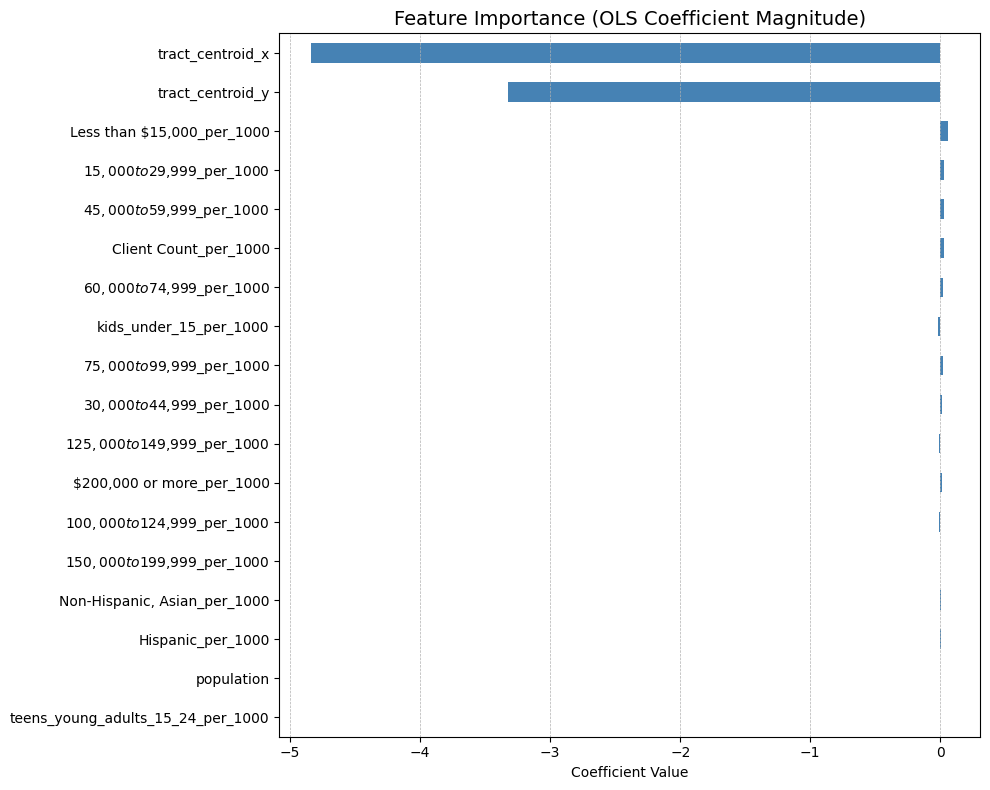

In [ ]:
# 📊 Plot feature importance (absolute coefficient magnitudes) from the OLS model

import matplotlib.pyplot as plt
import pandas as pd

# Get coefficients and feature names
coef_series = pd.Series(model.params[1:], index=model.params.index[1:])  # exclude intercept

# Sort by absolute value
coef_sorted = coef_series.reindex(coef_series.abs().sort_values(ascending=True).index)

# Plot
plt.figure(figsize=(10, 8))
coef_sorted.plot(kind='barh', color='steelblue')
plt.title("Feature Importance (OLS Coefficient Magnitude)", fontsize=14)
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.grid(True, axis='x', linestyle='--', linewidth=0.5)

# Show the plot
plt.show()


✅ Random Forest Regression Results
R² on test set: -2.3979
RMSE on test set: 11.2488


<ipython-input-113-a51b52ee9cc3>:67: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


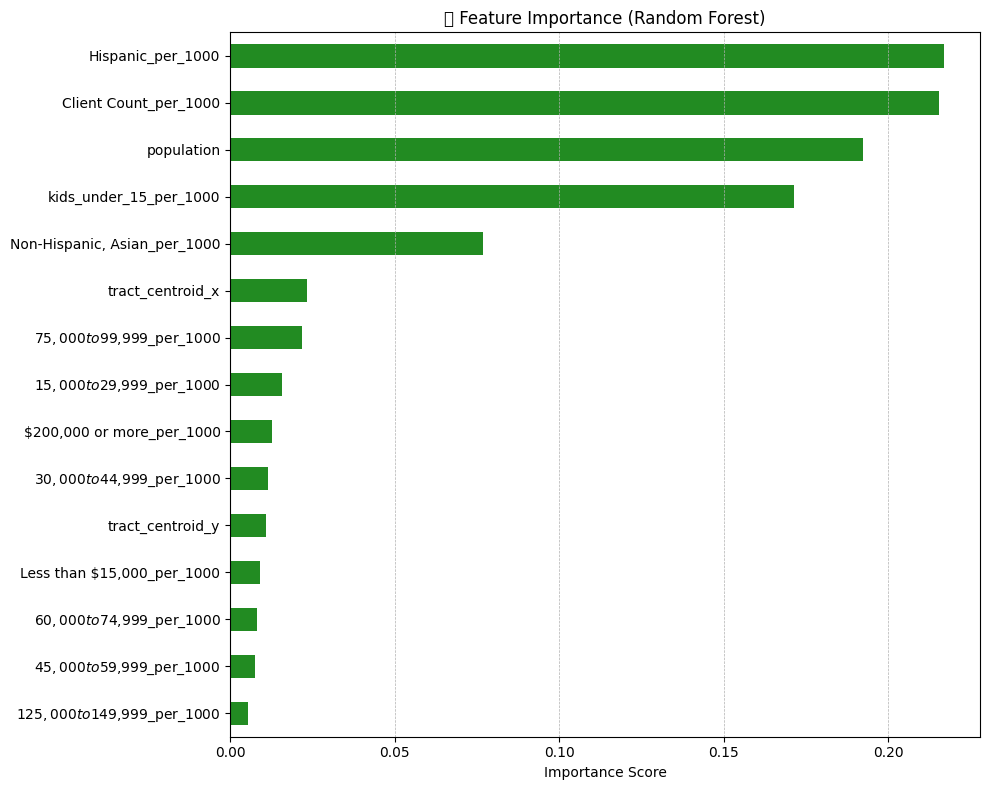

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Load your dataset
csv_path = "/content/drive/MyDrive/traffic data/social status merge/normalized_filtered_combined_age_groups_final.csv"
df = pd.read_csv(csv_path)

# Define the target variable
target = "total_accidents_per_1000"

# Define the features from your Lasso model
features_to_keep = [
    "Hispanic_per_1000",
    "Client Count_per_1000",
    "Less than $15,000_per_1000",
    "kids_under_15_per_1000",
    "$15,000 to $29,999_per_1000",
    "Non-Hispanic, Asian_per_1000",
    "population",
    "$60,000 to $74,999_per_1000",
    "tract_centroid_y",
    "tract_centroid_x",
    "$45,000 to $59,999_per_1000",
    "$75,000 to $99,999_per_1000",
    "$200,000 or more_per_1000",
    "$125,000 to $149,999_per_1000",
    "$30,000 to $44,999_per_1000"
]

# Drop missing values
df_filtered = df[features_to_keep + [target]].dropna()

# Prepare data
X = df_filtered[features_to_keep]
y = df_filtered[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("✅ Random Forest Regression Results")
print(f"R² on test set: {r2:.4f}")
print(f"RMSE on test set: {rmse:.4f}")

# Feature Importance
importances = pd.Series(rf.feature_importances_, index=features_to_keep).sort_values(ascending=True)

# Plot feature importances
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
importances.plot(kind='barh', color='forestgreen')
plt.title("🔍 Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.grid(True, axis='x', linestyle='--', linewidth=0.5)
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

# Load dataset
csv_path = "/content/drive/MyDrive/traffic data/social status merge/normalized_filtered_only.csv"
df = pd.read_csv(csv_path)

# Define target
target = "total_accidents_per_1000"
X = df.select_dtypes(include='number').drop(columns=[target])
y = df[target]

# Drop NA and align
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y.loc[X.index]

# Split into training/test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize for models that need it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Cross-validation setup on training set only
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Models
models = {
    "ElasticNet": ElasticNetCV(cv=5, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, verbosity=0),
    "SVR": SVR(kernel='rbf', C=1.0, epsilon=0.2),
    "KNN": KNeighborsRegressor(n_neighbors=5)
}

# Run cross-validation on training set only
results = []
for name, model in models.items():
    if name in ["SVR", "KNN"]:
        X_input = X_train_scaled
    else:
        X_input = X_train
    r2_scores = cross_val_score(model, X_input, y_train, cv=kf, scoring='r2')
    rmse_scores = np.sqrt(-cross_val_score(model, X_input, y_train, cv=kf, scoring='neg_mean_squared_error'))
    results.append({
        "Model": name,
        "Avg R² (Train CV)": r2_scores.mean(),
        "Avg RMSE (Train CV)": rmse_scores.mean()
    })

# Display results
results_df = pd.DataFrame(results).sort_values(by="Avg R² (Train CV)", ascending=False)
print(results_df)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.28334660948167, tolerance: 12.990356596113692
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 122.67479363723032, tolerance: 12.990356596113692
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 155.40650454648312, tolerance: 12.990356596113692
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: Convergen

              Model  Avg R² (Train CV)  Avg RMSE (Train CV)
2      RandomForest           0.472506            10.255414
1  GradientBoosting           0.446150            10.256179
5               KNN           0.237499            11.490910
0        ElasticNet           0.159362            11.929765
3           XGBoost           0.150807            12.074889
4               SVR           0.135764            12.424815


In [ ]:
# Mount Google Drive (if not already)
from google.colab import drive
drive.mount('/content/drive')

# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

# Load dataset
csv_path = "/content/drive/MyDrive/traffic data/social status merge/normalized_filtered_only.csv"
df = pd.read_csv(csv_path)

# Define target and feature set (all numeric columns except the target)
target = "total_accidents_per_1000"
X = df.select_dtypes(include='number').drop(columns=[target])
y = df[target]

# Clean: drop inf, NaNs
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y.loc[X.index]

# Split data into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize data for models that need it (SVR, KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
# Add to models
models = {
    "LinearRegression (OLS)": LinearRegression(),  # ✅ Added multivariable regression
    "ElasticNet": ElasticNetCV(cv=5, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, verbosity=0),
    "SVR": SVR(kernel='rbf', C=1.0, epsilon=0.2),
    "KNN": KNeighborsRegressor(n_neighbors=5)
}

# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate each model
results = []
for name, model in models.items():
    X_tr = X_train_scaled if name in ["SVR", "KNN"] else X_train
    X_te = X_test_scaled if name in ["SVR", "KNN"] else X_test

    # Cross-validation on training set
    r2_cv = cross_val_score(model, X_tr, y_train, cv=kf, scoring='r2')
    rmse_cv = np.sqrt(-cross_val_score(model, X_tr, y_train, cv=kf, scoring='neg_mean_squared_error'))

    # Train and test
    model.fit(X_tr, y_train)
    y_pred = model.predict(X_te)
    r2_test = r2_score(y_test, y_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

    # Store results
    results.append({
        "Model": name,
        "CV R² (Train)": r2_cv.mean(),
        "CV RMSE (Train)": rmse_cv.mean(),
        "Test R²": r2_test,
        "Test RMSE": rmse_test
    })

# Display results
results_df = pd.DataFrame(results).sort_values(by="Test R²", ascending=False)
print(results_df)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.28334660948167, tolerance: 12.990356596113692
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 122.67479363723032, tolerance: 12.990356596113692
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 155.40650454648312, tolerance: 12.990356596113692
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: Convergen

                    Model  CV R² (Train)  CV RMSE (Train)   Test R²  Test RMSE
6                     KNN       0.237499        11.490910  0.309696   5.070174
0  LinearRegression (OLS)    -133.607184       176.604022  0.205991   5.437701
2        GradientBoosting       0.446150        10.256179  0.201818   5.451973
5                     SVR       0.135764        12.424815  0.191845   5.485927
1              ElasticNet       0.159362        11.929765 -0.211982   6.718168
3            RandomForest       0.472506        10.255414 -0.217508   6.733465
4                 XGBoost       0.150807        12.074889 -0.227677   6.761526


In [ ]:


# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

# Load your dataset
csv_path = "/content/drive/MyDrive/traffic data/social status merge/normalized_filtered_combined_age_groups_final.csv"
df = pd.read_csv(csv_path)

# Target and selected features (from your Lasso model)
target = "total_accidents_per_1000"
features_to_keep = [
    "Hispanic_per_1000",
    "Client Count_per_1000",
    "Less than $15,000_per_1000",
    "kids_under_15_per_1000",
    "$15,000 to $29,999_per_1000",
    "Non-Hispanic, Asian_per_1000",
    "population",
    "$60,000 to $74,999_per_1000",
    "tract_centroid_y",
    "tract_centroid_x",
    "$45,000 to $59,999_per_1000",
    "$75,000 to $99,999_per_1000",
    "$200,000 or more_per_1000",
    "$125,000 to $149,999_per_1000",
    "$30,000 to $44,999_per_1000"
]

# Drop missing or infinite values
df_filtered = df[features_to_keep + [target]].replace([np.inf, -np.inf], np.nan).dropna()
X = df_filtered[features_to_keep]
y = df_filtered[target]

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features for SVR and KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add to models
models = {
    "LinearRegression (OLS)": LinearRegression(),  # ✅ Added multivariable regression
    "ElasticNet": ElasticNetCV(cv=5, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, verbosity=0),
    "SVR": SVR(kernel='rbf', C=1.0, epsilon=0.2),
    "KNN": KNeighborsRegressor(n_neighbors=5)
}


# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate models
results = []
for name, model in models.items():
    X_tr = X_train_scaled if name in ["SVR", "KNN"] else X_train
    X_te = X_test_scaled if name in ["SVR", "KNN"] else X_test

    # Cross-validation on training data
    r2_cv = cross_val_score(model, X_tr, y_train, cv=kf, scoring='r2')
    rmse_cv = np.sqrt(-cross_val_score(model, X_tr, y_train, cv=kf, scoring='neg_mean_squared_error'))

    # Train on training set and evaluate on test set
    model.fit(X_tr, y_train)
    y_pred = model.predict(X_te)
    r2_test = r2_score(y_test, y_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

    results.append({
        "Model": name,
        "CV R² (Train)": r2_cv.mean(),
        "CV RMSE (Train)": rmse_cv.mean(),
        "Test R²": r2_test,
        "Test RMSE": rmse_test
    })

# Display results
results_df = pd.DataFrame(results).sort_values(by="Test R²", ascending=False)
print(results_df)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                    Model  CV R² (Train)  CV RMSE (Train)   Test R²  Test RMSE
0  LinearRegression (OLS)     -14.359606        28.466101  0.255450   5.265621
6                     KNN       0.246986        11.933209  0.139778   5.659891
5                     SVR       0.107119        12.534996  0.135427   5.674185
1              ElasticNet       0.311679         8.348192 -0.037438   6.215612
3            RandomForest       0.477259        10.207594 -2.397870  11.248797
4                 XGBoost      -0.566869        15.269441 -9.000939  19.298479
2        GradientBoosting       0.518298         9.834197 -9.906813  20.153553


In [ ]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Load data
csv_path = "/content/drive/MyDrive/traffic data/social status merge/normalized_filtered_combined_age_groups_final.csv"
df = pd.read_csv(csv_path)

# Define target and features (same as before)
target = "total_accidents_per_1000"
features_to_keep = [
    "Hispanic_per_1000", "Client Count_per_1000", "Less than $15,000_per_1000",
    "kids_under_15_per_1000", "$15,000 to $29,999_per_1000", "Non-Hispanic, Asian_per_1000",
    "population", "$60,000 to $74,999_per_1000", "tract_centroid_y", "tract_centroid_x",
    "$45,000 to $59,999_per_1000", "$75,000 to $99,999_per_1000", "$200,000 or more_per_1000",
    "$125,000 to $149,999_per_1000", "$30,000 to $44,999_per_1000"
]

# Filter clean data
df_filtered = df[features_to_keep + [target]].dropna()
X = df_filtered[features_to_keep]
y = df_filtered[target]

# Add constant for OLS
X_const = sm.add_constant(X)

# Fit full OLS model
model = sm.OLS(y, X_const).fit()

# Compute residuals and standardized residuals
residuals = model.resid
z_scores = (residuals - residuals.mean()) / residuals.std()

# Add back to DataFrame
df_filtered["residual"] = residuals
df_filtered["z_score"] = z_scores

# Flag outliers with |z| > 3
outliers = df_filtered[np.abs(z_scores) > 3]

# Show outliers
print(f"🔍 Number of outliers found: {len(outliers)}")
print(outliers[[target, "residual", "z_score"]])


🔍 Number of outliers found: 7
     total_accidents_per_1000   residual    z_score
110                 55.124892  35.633516   6.609028
111                 54.385105  30.287640   5.617516
124                 80.645161  70.947098  13.158717
126                 64.572426  49.372588   9.157244
149                 36.771580  27.406546   5.083153
279                 26.649077  24.463567   4.537313
329                 25.738077  17.730846   3.288580


🔍 Found 7 outliers:



,Hispanic_per_1000,Client Count_per_1000,"Less than $15,000_per_1000",kids_under_15_per_1000,"$15,000 to $29,999_per_1000","Non-Hispanic, Asian_per_1000",population,"$60,000 to $74,999_per_1000",tract_centroid_y,tract_centroid_x,"$45,000 to $59,999_per_1000","$75,000 to $99,999_per_1000","$200,000 or more_per_1000","$125,000 to $149,999_per_1000","$30,000 to $44,999_per_1000",total_accidents_per_1000,residual,z_score,predicted
110,170.542636,19.236291,154.177433,26.414011,47.372954,85.271318,3483,60.579960,32.715696,-117.158805,39.333908,114.843526,86.706862,27.849555,93.597473,55.124892,35.633516,6.609028,19.491377
111,668.789809,15.188633,194.022538,41.156296,50.955414,164.135228,2041,91.621754,32.715672,-117.163786,63.694268,91.621754,125.428711,40.176384,11.758942,54.385105,30.287640,5.617516,24.097465
124,102.150538,37.634409,16.129032,21.505376,37.634409,0.000000,186,37.634409,32.731824,-117.192031,37.634409,48.387097,48.387097,21.505376,37.634409,80.645161,70.947098,13.158717,9.698063
126,315.183246,18.150087,85.165794,86.561955,94.589878,65.968586,2865,75.043630,32.752179,-117.200783,55.148342,55.148342,54.799302,15.706806,53.054101,64.572426,49.372588,9.157244,15.199838
149,112.184481,10.906825,8.725460,46.431910,50.794640,29.292615,3209,72.296666,32.794884,-117.253400,77.282643,88.812714,31.473979,37.706451,36.771580,36.771580,27.406546,5.083153,9.365034
279,864.907652,10.290237,7.387863,217.678100,13.720317,129.023747,3790,17.150396,32.560144,-116.952997,19.788918,25.329815,35.883905,40.633245,6.332454,26.649077,24.463567,4.537313,2.185509
329,896.669190,35.957608,22.710068,222.180167,38.228615,38.228615,2642,43.906132,32.609091,-117.091653,50.340651,62.452687,13.626041,4.163512,36.336109,25.738077,17.730846,3.288580,8.007231


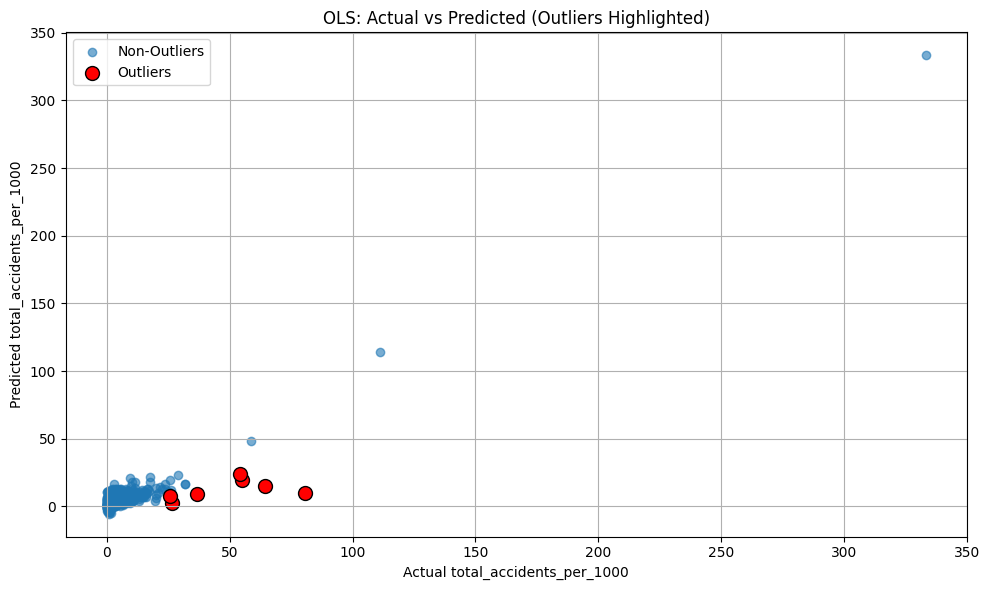

In [ ]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

# Load your dataset
csv_path = "/content/drive/MyDrive/traffic data/social status merge/normalized_filtered_combined_age_groups_final.csv"
df = pd.read_csv(csv_path)

# Define target and selected features
target = "total_accidents_per_1000"
features_to_keep = [
    "Hispanic_per_1000",
    "Client Count_per_1000",
    "Less than $15,000_per_1000",
    "kids_under_15_per_1000",
    "$15,000 to $29,999_per_1000",
    "Non-Hispanic, Asian_per_1000",
    "population",
    "$60,000 to $74,999_per_1000",
    "tract_centroid_y",
    "tract_centroid_x",
    "$45,000 to $59,999_per_1000",
    "$75,000 to $99,999_per_1000",
    "$200,000 or more_per_1000",
    "$125,000 to $149,999_per_1000",
    "$30,000 to $44,999_per_1000"
]

# Filter and prepare data
df_filtered = df[features_to_keep + [target]].dropna()
X = df_filtered[features_to_keep]
y = df_filtered[target]
X_const = sm.add_constant(X)

# Fit OLS model
model = sm.OLS(y, X_const).fit()
y_pred = model.predict(X_const)

# Compute residuals and z-scores
df_filtered["residual"] = model.resid
df_filtered["z_score"] = (model.resid - model.resid.mean()) / model.resid.std()
df_filtered["predicted"] = y_pred

# Identify outliers (|z| > 3)
outliers = df_filtered[np.abs(df_filtered["z_score"]) > 3]
print(f"🔍 Found {len(outliers)} outliers:\n")
display(outliers)

# 📈 Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.6, label="Non-Outliers")
plt.scatter(outliers[target], outliers["predicted"], color="red", edgecolor="k", s=100, label="Outliers")
plt.xlabel("Actual total_accidents_per_1000")
plt.ylabel("Predicted total_accidents_per_1000")
plt.title("OLS: Actual vs Predicted (Outliers Highlighted)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Load the dataset
csv_path = "/content/drive/MyDrive/traffic data/social status merge/normalized_filtered_combined_age_groups_final.csv"
df = pd.read_csv(csv_path)

# Define features and target
target = "total_accidents_per_1000"
features_to_keep = [
    "Hispanic_per_1000",
    "teens_young_adults_15_24_per_1000",
    "Non-Hispanic, Asian_per_1000",
    "kids_under_15_per_1000",
    "$15,000 to $29,999_per_1000",
    "Client Count_per_1000",
    "Less than $15,000_per_1000",
    "$45,000 to $59,999_per_1000",
    "tract_centroid_x",
    "tract_centroid_y",
    "population"
]

# Drop missing values
df_filtered = df[features_to_keep + [target]].dropna()

# Define X and y
X = df_filtered[features_to_keep]
y = df_filtered[target]

# Add constant term for statsmodels
X_const = sm.add_constant(X)

# Create a new random 80/20 split (new random_state ensures a different split)
X_train, X_test, y_train, y_test = train_test_split(X_const, y, test_size=0.2, random_state=None)

# Fit model on training data
model = sm.OLS(y_train, X_train).fit()

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print results
print("✅ OLS Test Performance (New 80/20 Split):")
print(f"R² on test set: {r2:.4f}")
print(f"RMSE on test set: {rmse:.4f}")

# Print model summary from training
print("\n🔍 OLS Training Summary:")
print(model.summary())


✅ OLS Test Performance (New 80/20 Split):
R² on test set: 0.9120
RMSE on test set: 8.5176

🔍 OLS Training Summary:
                               OLS Regression Results                               
Dep. Variable:     total_accidents_per_1000   R-squared:                       0.597
Model:                                  OLS   Adj. R-squared:                  0.589
Method:                       Least Squares   F-statistic:                     77.27
Date:                      Mon, 05 May 2025   Prob (F-statistic):          1.29e-105
Time:                              05:28:35   Log-Likelihood:                -1738.8
No. Observations:                       586   AIC:                             3502.
Df Residuals:                           574   BIC:                             3554.
Df Model:                                11                                         
Covariance Type:                  nonrobust                                         
                                   

In [ ]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Load the OLS dataset used for modeling
csv_model = "/content/drive/MyDrive/traffic data/social status merge/normalized_filtered_combined_age_groups_final.csv"
df_model = pd.read_csv(csv_model)

# Load the full original dataset to match outliers
csv_full = "/content/drive/MyDrive/traffic data/social status merge/normalized_by_population_per_1000.csv"
df_full = pd.read_csv(csv_full)

# Define features and target used in modeling
target = "total_accidents_per_1000"
features_to_keep = [
    "Hispanic_per_1000", "Client Count_per_1000", "Less than $15,000_per_1000",
    "kids_under_15_per_1000", "$15,000 to $29,999_per_1000", "Non-Hispanic, Asian_per_1000",
    "population", "$60,000 to $74,999_per_1000", "tract_centroid_y", "tract_centroid_x",
    "$45,000 to $59,999_per_1000", "$75,000 to $99,999_per_1000", "$200,000 or more_per_1000",
    "$125,000 to $149,999_per_1000", "$30,000 to $44,999_per_1000"
]

# Filter clean data
df_filtered = df_model[features_to_keep + [target]].dropna()
X = df_filtered[features_to_keep]
y = df_filtered[target]
X_const = sm.add_constant(X)

# Fit OLS model
model = sm.OLS(y, X_const).fit()
df_filtered["residual"] = model.resid
df_filtered["z_score"] = (model.resid - model.resid.mean()) / model.resid.std()
df_filtered["predicted"] = model.predict(X_const)

# Identify outliers
outliers = df_filtered[np.abs(df_filtered["z_score"]) > 3]
outlier_indices = outliers.index

# Match rows from original full dataset and add prediction info
outlier_rows_full = df_full.loc[outlier_indices].copy()
outlier_rows_full["predicted"] = df_filtered.loc[outlier_indices, "predicted"]
outlier_rows_full["residual"] = df_filtered.loc[outlier_indices, "residual"]
outlier_rows_full["z_score"] = df_filtered.loc[outlier_indices, "z_score"]

# Save to CSV
output_path = "/content/drive/MyDrive/traffic data/social status merge/OLS_outliers_matched_rows.csv"
outlier_rows_full.to_csv(output_path, index=False)

print(f"✅ Outlier rows (with predicted, residual, z-score) saved to:\n{output_path}")



✅ Outlier rows (with predicted, residual, z-score) saved to:
/content/drive/MyDrive/traffic data/social status merge/OLS_outliers_matched_rows.csv


In [ ]:
# Standardize all features (z-scores)
feature_zscores = (X - X.mean()) / X.std()

# Merge with the outlier z-scores
outlier_indices = outliers.index
outlier_features = feature_zscores.loc[outlier_indices]

# Threshold for identifying extreme values in feature columns
z_threshold = 2.5

# Find extreme values in each outlier row
print("🔎 Feature-level Z-scores for each outlier:")
for idx, row in outlier_features.iterrows():
    print(f"\n🟥 Outlier at index {idx} — Predicted: {df_filtered.loc[idx, 'predicted']:.2f}, Actual: {df_filtered.loc[idx, target]:.2f}")
    extreme_features = row[np.abs(row) > z_threshold]
    if not extreme_features.empty:
        print("⚠️ Features contributing to outlier status (|z| > 2.5):")
        for col, z in extreme_features.items():
            print(f"  {col}: z = {z:.2f}")
    else:
        print("✅ No individual features with extreme z-score — may be a complex interaction or model misspecification.")


🔎 Feature-level Z-scores for each outlier:

🟥 Outlier at index 110 — Predicted: 19.49, Actual: 55.12
⚠️ Features contributing to outlier status (|z| > 2.5):
  Less than $15,000_per_1000: z = 4.82
  $75,000 to $99,999_per_1000: z = 2.79
  $30,000 to $44,999_per_1000: z = 2.54

🟥 Outlier at index 111 — Predicted: 24.10, Actual: 54.39
⚠️ Features contributing to outlier status (|z| > 2.5):
  Less than $15,000_per_1000: z = 6.34
  $60,000 to $74,999_per_1000: z = 2.55

🟥 Outlier at index 124 — Predicted: 9.70, Actual: 80.65
✅ No individual features with extreme z-score — may be a complex interaction or model misspecification.

🟥 Outlier at index 126 — Predicted: 15.20, Actual: 64.57
✅ No individual features with extreme z-score — may be a complex interaction or model misspecification.

🟥 Outlier at index 149 — Predicted: 9.37, Actual: 36.77
✅ No individual features with extreme z-score — may be a complex interaction or model misspecification.

🟥 Outlier at index 279 — Predicted: 2.19, Actu

In [ ]:
print("Client Count_per_1000" in df.columns)
print(df.columns.tolist())  # See all column names


False
['tract_centroid_x', 'tract_centroid_y', '$100,000 to $124,999_per_1000', '$125,000 to $149,999_per_1000', '$15,000 to $29,999_per_1000', '$150,000 to $199,999_per_1000', '$200,000 or more_per_1000', '$30,000 to $44,999_per_1000', '$45,000 to $59,999_per_1000', '$60,000 to $74,999_per_1000', '$75,000 to $99,999_per_1000', 'Less than $15,000_per_1000', 'Hispanic_per_1000', 'Non-Hispanic, Asian_per_1000', 'total_accidents_per_1000', '65_and_above_per_1000', 'kids_under_15_per_1000', 'teens_young_adults_15_24_per_1000']


In [ ]:
# 📊 This script drops non-significant predictors from the regression model and re-runs OLS on the remaining features.

import pandas as pd
import statsmodels.api as sm

# Load the dataset
csv_path = "/content/drive/MyDrive/traffic data/social status merge/normalized_filtered_final_dropped_inf_columns.csv"
df = pd.read_csv(csv_path)

# Drop non-significant predictors based on previous regression results
columns_to_drop = [
    'teens_young_adults_15_24_per_1000',
    'Non-Hispanic, Asian_per_1000',
    '$150,000 to $199,999_per_1000',
    'tract_centroid_x',
    '$30,000 to $44,999_per_1000',
    '$125,000 to $149,999_per_1000',
    'tract_centroid_y',
    '$100,000 to $124,999_per_1000'
]

# Drop only if they exist
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

# Define remaining features manually (you could also automate this from the previous set)
features = [
    "Hispanic_per_1000", "65_and_above_per_1000", "kids_under_15_per_1000",
    "$200,000 or more_per_1000", "$15,000 to $29,999_per_1000",
    "$60,000 to $74,999_per_1000", "$45,000 to $59,999_per_1000",
    "Less than $15,000_per_1000", "$75,000 to $99,999_per_1000"
]

# Define target
target = "total_accidents_per_1000"

# Drop NA rows from selected features
regression_df = df[features + [target]].dropna()

# Prepare inputs
X = regression_df[features]
y = regression_df[target]
X_const = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X_const).fit()

# Show the summary
print(model.summary())


                               OLS Regression Results                               
Dep. Variable:     total_accidents_per_1000   R-squared:                       0.797
Model:                                  OLS   Adj. R-squared:                  0.794
Method:                       Least Squares   F-statistic:                     314.6
Date:                      Fri, 02 May 2025   Prob (F-statistic):          3.51e-243
Time:                              18:59:35   Log-Likelihood:                -2417.6
No. Observations:                       733   AIC:                             4855.
Df Residuals:                           723   BIC:                             4901.
Df Model:                                 9                                         
Covariance Type:                  nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [ ]:
# 📊 This script runs a full multiple linear regression using all numeric features to predict total_accidents_per_1000.

import pandas as pd
import statsmodels.api as sm

# Load the full dataset (not previously dropped)
csv_path = "/content/drive/MyDrive/traffic data/social status merge/normalized_filtered_final_dropped_inf_columns.csv"
df = pd.read_csv(csv_path)

# Set target variable
target = "total_accidents_per_1000"

# Select all numeric columns and remove rows with NA
numeric_df = df.select_dtypes(include='number').dropna()

# Separate features and target
X = numeric_df.drop(columns=[target])
y = numeric_df[target]

# Add intercept
X_const = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X_const).fit()

# Display summary
print(model.summary())


                               OLS Regression Results                               
Dep. Variable:     total_accidents_per_1000   R-squared:                       0.798
Model:                                  OLS   Adj. R-squared:                  0.793
Method:                       Least Squares   F-statistic:                     165.9
Date:                      Fri, 02 May 2025   Prob (F-statistic):          1.33e-234
Time:                              19:04:14   Log-Likelihood:                -2415.3
No. Observations:                       733   AIC:                             4867.
Df Residuals:                           715   BIC:                             4949.
Df Model:                                17                                         
Covariance Type:                  nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

In [ ]:
features = [
    "Speed_2022_MPH", "Lanes", "1_year_Speed_%_change", "Speed_Limit_MPH",
    "cloudcover", "humidity", "windspeed", "AADT_Category_Num"
]

regression_df = df[features + ["AVG_SEVERITY"]].dropna()
X = regression_df[features]
y = regression_df["AVG_SEVERITY"]

X_const = sm.add_constant(X)

model = sm.OLS(y, X_const).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AVG_SEVERITY   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     159.4
Date:                Wed, 30 Apr 2025   Prob (F-statistic):          2.51e-242
Time:                        18:01:09   Log-Likelihood:                -5832.2
No. Observations:                5488   AIC:                         1.168e+04
Df Residuals:                    5479   BIC:                         1.174e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.3684      0.138     17.121      0.000       2.097       2.640
Speed_2022_MPH           -0.0330      0.001    -27.248      0.000      -0.035      -0.031
Lanes                     0.0457      0.006      8.227      0.000       0.035       0.057
1_year_Speed_%_change     0.0104      0.002      6.744      0.000       0.007       0.013
Speed_Limit_MPH           0.0432      0.003     13.661      0.000       0.037       0.049
cloudcover               -0.0011      0.000     -2.690      0.007      -0.002      -0.000
humidity                 -0.0009      0.001     -0.947      0.344      -0.003       0.001
windspeed                -0.0017      0.003     -0.549      0.583      -0.008       0.004
AADT_Category_Num        -0.1350      0.013    -10.762      0.000      -0.160      -0.110
==============================================================================
Omnibus:                      328.338   Durbin-Watson:                   0.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.618
Skew:                          -0.266   Prob(JB):                     5.42e-38
Kurtosis:                       2.317   Cond. No.                     1.51e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

✅ Key Takeaways

Predictor	Coef.	Interpretation
- Speed_2022_MPH	−0.033	Higher posted speeds → lower severity (possibly highways vs. city streets)
- Lanes	+0.046	More lanes → higher severity (likely due to higher-speed exposure)
- Speed_Limit_MPH	+0.043	Speed limit positively linked to severity — aligns with Lanes
- 1yr Speed % Change	+0.010	Speed increases are linked to higher severity
- AADT_Category_Num	−0.135	Higher traffic volumes → lower severity (possibly more congested = slower)
- cloudcover	−0.0011	Slight decrease in severity with cloudiness
- humidity / windspeed	NS	Not statistically significant

📊 Model Stats
- R² = 0.189 → Model explains ~19% of severity variation — decent for real-world accident data

- All main predictors are statistically significant (p < 0.05) except humidity & windspeed

- Durbin-Watson = 0.09 → Potential autocorrelation (common in spatial/temporal data)



#### Test Pedictors of Frequency

In [ ]:
features = [
    "Speed_2022_MPH", "Lanes", "1_year_Speed_%_change", "Speed_Limit_MPH",
    "cloudcover", "humidity", "windspeed", "AADT_Category_Num"
]

reg_df_freq = df[features + ["TOTAL_CRASHES"]].dropna()
X_freq = reg_df_freq[features]
y_freq = reg_df_freq["TOTAL_CRASHES"]

X_freq_const = sm.add_constant(X_freq)

model_freq = sm.OLS(y_freq, X_freq_const).fit()
model_freq.summary()

                            OLS Regression Results                            
Dep. Variable:          TOTAL_CRASHES   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     232.0
Date:                Wed, 30 Apr 2025   Prob (F-statistic):               0.00
Time:                        18:01:09   Log-Likelihood:                -31413.
No. Observations:                5488   AIC:                         6.284e+04
Df Residuals:                    5479   BIC:                         6.290e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    57.27

✅ Key Predictors of Crash Frequency

Variable	Coef.	p-value	Insight
- Speed_2022_MPH	−4.70	<0.001	Lower speeds → more crashes (likely due to denser traffic areas like intersections)
- Speed_Limit_MPH	+4.60	<0.001	Higher limits → more crashes — may overlap with arterial roads
- Lanes	−1.99	0.001	Fewer lanes → more crashes (again aligns with narrow urban streets)
- AADT_Category_Num	−21.6	<0.001	Heavier traffic roads → fewer crashes (likely highways, fewer intersections)
- 1yr Speed % Change	+0.97	<0.001	Areas where speeds increased recently see more crashes
- cloudcover	−0.25	<0.001	More crashes under clearer skies — possibly linked to higher driving speeds
- humidity	NS	0.604	Not statistically significant
- windspeed	+0.81	0.015	Slight increase in crashes with wind

📊 Model Performance
- R² = 0.253 → explains ~25% of crash frequency variation — reasonable for traffic data
- Durbin-Watson = 0.13 → residual autocorrelation likely (e.g. by spatial clustering)

🔍 Interpretation Summary
- Urban roads with lower speeds, fewer lanes, and mid-range traffic volumes have more crashes
- Clearer skies and rising speeds both increase crash frequency

#### Test Interactions

In [ ]:
df["speed_cloud_interaction"] = df["Speed_2022_MPH"] * df["cloudcover"]

features_interaction = [
    "Speed_2022_MPH", "cloudcover", "speed_cloud_interaction", "Lanes",
    "1_year_Speed_%_change", "Speed_Limit_MPH", "humidity",
    "windspeed", "AADT_Category_Num"
]

reg_df_interact = df[features_interaction + ["TOTAL_CRASHES"]].dropna()
X_inter = reg_df_interact[features_interaction]
y_inter = reg_df_interact["TOTAL_CRASHES"]

X_inter_const = sm.add_constant(X_inter)
model_inter = sm.OLS(y_inter, X_inter_const).fit()
model_inter.summary()

                            OLS Regression Results                            
Dep. Variable:          TOTAL_CRASHES   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     209.4
Date:                Wed, 30 Apr 2025   Prob (F-statistic):               0.00
Time:                        18:01:10   Log-Likelihood:                -31402.
No. Observations:                5488   AIC:                         6.282e+04
Df Residuals:                    5478   BIC:                         6.289e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

✅ Interpretation of Key Results

- Variable	Coef.	Significance	Interpretation
- Speed_2022_MPH	−5.87	p < 0.001	Higher speeds reduce crash counts (likely highways vs. intersections)
- cloudcover	−0.83	p < 0.001	Crashes decrease as skies get cloudier — possibly due to driver caution
-  speed × cloudcover	+0.021	p < 0.001

Interaction is significant:
- When cloudcover is high, the negative effect of speed on crashes weakens
- In clear skies, speed strongly reduces crashes (open roads)
- But under cloudy conditions, speed's effect on crash counts becomes less negative — possibly due to driver behavior or visibility

📊 Model Fit:
- R² improved slightly from 0.253 → 0.256
- All main effects still hold

In [ ]:
features_rf = [
    "Speed_2022_MPH", "cloudcover", "speed_cloud_interaction", "Lanes",
    "1_year_Speed_%_change", "Speed_Limit_MPH", "humidity", "windspeed", "AADT_Category_Num"
]

df_rf = df[features_rf + ["TOTAL_CRASHES"]].dropna()
X_rf = df_rf[features_rf]
y_rf = df_rf["TOTAL_CRASHES"]

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.3, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf, y_train_rf)

y_pred_rf = rf_model.predict(X_test_rf)
rf_r2 = r2_score(y_test_rf, y_pred_rf)
rf_rmse = mean_squared_error(y_test_rf, y_pred_rf, squared=False)

importances = pd.Series(rf_model.feature_importances_, index=features_rf).sort_values(ascending=False)
rf_r2, rf_rmse

(0.8345583804030527, 35.154988527040786)

📊 Performance Summary:
- R² = 0.835 → Model explains 83.5% of crash count variation (huge improvement over linear regression's 25%)
- RMSE ≈ 35.15 → On average, your model misses by ~35 crashes (check scale to assess if this is acceptable)

🔍 Insights:
- Random Forest captured nonlinear thresholds and interactions that linear regression missed

Ideal for identifying complex patterns like:
- Speed effects only beyond certain thresholds
- Compound effects (e.g., low cloudcover + high speed + narrow roads)

## SOC vs Accidents

In [ ]:
soc = pd.read_csv('/Users/annaywj/Downloads/SOC_-_Local_Roads__Speed_and_Volume_20250423.csv')

In [ ]:
numeric_cols = [
    "Speed_2022_MPH", "Speed_Limit_MPH", "1_year_Speed_%_change",
    "2022_AADT_Range", "Lanes", "TOTAL_CRASHES", "AVG_SEVERITY"
]

aadt_order = [
    "<1,000", "1,000-4,999", "5,000-9,999", "10,000-19,999", "20,000-39,999",
    "40,000-64,999", "65,000-99,999", "100,000+"
]
df["AADT_Category"] = df["2022_AADT_Range"].astype(str).str.strip()
df["AADT_Category_Num"] = df["AADT_Category"].apply(lambda x: aadt_order.index(x) if x in aadt_order else None)

df_corr = df[[
    "Speed_2022_MPH", "Speed_Limit_MPH", "1_year_Speed_%_change",
    "AADT_Category_Num", "Lanes", "TOTAL_CRASHES", "AVG_SEVERITY"
]].dropna()

corr_matrix = df_corr.corr()

print("Correlations with TOTAL_CRASHES:")
print(corr_matrix["TOTAL_CRASHES"].sort_values(key=abs, ascending=False))

print("\nCorrelations with AVG_SEVERITY:")
print(corr_matrix["AVG_SEVERITY"].sort_values(key=abs, ascending=False))

Correlations with TOTAL_CRASHES:
TOTAL_CRASHES            1.000000
Speed_2022_MPH          -0.385515
AVG_SEVERITY             0.364760
AADT_Category_Num       -0.181270
1_year_Speed_%_change    0.066290
Lanes                    0.064046
Speed_Limit_MPH          0.021183
Name: TOTAL_CRASHES, dtype: float64

Correlations with AVG_SEVERITY:
AVG_SEVERITY             1.000000
TOTAL_CRASHES            0.364760
Speed_2022_MPH          -0.360733
AADT_Category_Num       -0.214891
Lanes                    0.182719
1_year_Speed_%_change    0.075989
Speed_Limit_MPH          0.032789
Name: AVG_SEVERITY, dtype: float64


✅ Correlation with TOTAL_CRASHES
Variable	Corr	Insight
- Speed_2022_MPH	−0.39	Fewer crashes on faster roads → likely highways, fewer intersections
- AADT_Category_Num	−0.18	Heavier traffic roads → fewer crashes → same interpretation
- Lanes	+0.06	Slight increase in crashes on wider roads
- Speed_Limit_MPH	+0.02	Barely correlated
- AVG_SEVERITY	+0.36	Areas with more crashes tend to have worse injuries

✅ Correlation with AVG_SEVERITY
- Variable	Corr	Insight
- Speed_2022_MPH	−0.36	Higher posted speeds linked to lower severity — again, highways vs. local roads
- AADT_Category_Num	−0.21	More traffic → less severity (possibly due to congestion slowing speeds)
- Lanes	+0.18	Slight increase in severity on wider roads

🔍 Interpretation Summary:
High-speed, high-volume roads (like highways) have:
- Fewer crashes
- Less severe crashes

Urban roads with lower speeds, fewer lanes, and lower AADT tend to see:
- More frequent
- More severe accidents

              precision    recall  f1-score   support

           1       0.94      0.95      0.94       412
           2       0.97      0.95      0.96       660
           3       0.96      0.98      0.97       927
           4       0.98      0.87      0.92       100

    accuracy                           0.96      2099
   macro avg       0.96      0.94      0.95      2099
weighted avg       0.96      0.96      0.96      2099



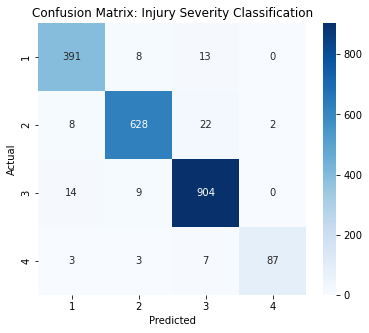

In [ ]:
features_cls = [
    "Speed_2022_MPH", "Lanes", "1_year_Speed_%_change", "Speed_Limit_MPH",
    "AADT_Category_Num"
]

df_cls = df[features_cls + ["AVG_SEVERITY"]].dropna()
X_cls = df_cls[features_cls]
y_cls = df_cls["AVG_SEVERITY"].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X_cls, y_cls, test_size=0.3, random_state=42)

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=np.unique(y_cls), yticklabels=np.unique(y_cls))
plt.title("Confusion Matrix: Injury Severity Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
features_cls = ["Speed_2022_MPH", "Lanes", "1_year_Speed_%_change", "Speed_Limit_MPH", "AADT_Category_Num"]
df_vif = df[features_cls].dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_vif)

vif_df = pd.DataFrame()
vif_df["Feature"] = features_cls
vif_df["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

vif_df

                 Feature       VIF
0         Speed_2022_MPH  1.158329
1                  Lanes  1.061987
2  1_year_Speed_%_change  1.019077
3        Speed_Limit_MPH  1.127366
4      AADT_Category_Num  1.007509


## Socio vs Accidents

In [ ]:
socio_df = pd.read_csv("/Users/annaywj/Downloads/socioeconomic_merged.csv")

In [ ]:
crashes_coord = pd.read_csv("/Users/annaywj/Desktop/SDSU/BDA600/Capstone/combined_crashes_2018_2024.csv")
socio = pd.read_csv("/Users/annaywj/Downloads/socioeconomic_merged.csv")
crashes_coord["AVG_SEVERITY"] = (
    3 * crashes_coord["COUNT_SEVERE_INJ"] +
    2 * crashes_coord["COUNT_VISIBLE_INJ"] +
    1 * crashes_coord["COUNT_COMPLAINT_PAIN"]
) / crashes_coord["NUMBER_INJURED"].replace(0, np.nan)

/var/folders/4k/gkr388115hjbdbj5xzxdyy9h0000gn/T/ipykernel_62084/3024622571.py:2: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  crashes_coord = pd.read_csv("/Users/annaywj/Desktop/SDSU/BDA600/Capstone/combined_crashes_2018_2024.csv")


In [ ]:
regression_vars = [c for c in crashes_coord.columns if c.endswith("_pct")] + ["AVG_SEVERITY"]
df_reg = crashes_coord[regression_vars].dropna()

X = df_reg.drop(columns="AVG_SEVERITY")
y = df_reg["AVG_SEVERITY"]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AVG_SEVERITY   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 30 Apr 2025   Prob (F-statistic):                nan
Time:                        18:01:12   Log-Likelihood:                -36146.
No. Observations:               32601   AIC:                         7.229e+04
Df Residuals:                   32600   BIC:                         7.230e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7987      0.004    442.884      0.000       1.791       1.807
==============================================================================
Omnibus:                    14187.619   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2284.748
Skew:                           0.342   Prob(JB):                         0.00
Kurtosis:                       1.898   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

✅ Correlations (Pearson):
- AVG_SEVERITY is positively correlated with:
- TOTAL_CRASHES: +0.36
- Lanes: +0.18
- % of some low/mid-age or low-income groups (e.g., 5 to 9_pct = +3.5 coef)

Negatively correlated with:
- Speed_2022_MPH: -0.36
- AADT_Category_Num: -0.21
- cloudcover, humidity (mildly)

📊 Multicollinearity (VIFs):
- All < 2 → ✅ No multicollinearity concern

📉 OLS Regression for AVG_SEVERITY:
- R² = 0.012 → Very weak explanatory power for this model

Statistically significant predictors include:
- 5 to 9_pct: positive effect
- Possibly 35 to 39_pct or 25 to 29_pct (borderline)
- Income bands and most other age groups not significant

This tells us:
- Demographic composition alone does not strongly predict injury severity
- Possibly, environmental, behavioral, or crash-level features explain more

In [ ]:
crashes_coord_clean = crashes_coord.dropna(subset=["LATITUDE", "LONGITUDE"]).copy()
crashes_gdf = gpd.GeoDataFrame(
    crashes_coord_clean,
    geometry=gpd.points_from_xy(crashes_coord_clean["LONGITUDE"], crashes_coord_clean["LATITUDE"]),
    crs="EPSG:4326"
)

socio_gdf = socio.copy()
socio_gdf["geometry"] = gpd.GeoSeries.from_wkt(socio_gdf["geometry"])
socio_gdf = gpd.GeoDataFrame(socio_gdf, geometry="geometry", crs="EPSG:4326")

crashes_with_tract = gpd.sjoin(
    crashes_gdf,
    socio_gdf[["GEOID", "population", "geometry"]],
    how="left",
    predicate="within"
)

In [ ]:
sample_crashes = crashes_coord_clean.head(500).copy()
sample_crashes_gdf = gpd.GeoDataFrame(
    sample_crashes,
    geometry=gpd.points_from_xy(sample_crashes["LONGITUDE"], sample_crashes["LATITUDE"]),
    crs="EPSG:4326"
)

socio_gdf = socio.copy()
socio_gdf["geometry"] = gpd.GeoSeries.from_wkt(socio_gdf["geometry"])
socio_gdf = gpd.GeoDataFrame(socio_gdf, geometry="geometry", crs="EPSG:4326")

joined_rows = []
for _, crash in sample_crashes_gdf.iterrows():
    point = crash.geometry
    match = socio_gdf[socio_gdf.contains(point)]
    if not match.empty:
        result = crash.to_dict()
        result["GEOID"] = match.iloc[0]["GEOID"]
        result["population"] = match.iloc[0]["population"]
        joined_rows.append(result)

joined_sample = pd.DataFrame(joined_rows)

In [ ]:
crashes_with_tract["AVG_SEVERITY"] = (
    3 * crashes_with_tract["COUNT_SEVERE_INJ"] +
    2 * crashes_with_tract["COUNT_VISIBLE_INJ"] +
    1 * crashes_with_tract["COUNT_COMPLAINT_PAIN"]
) / crashes_with_tract["NUMBER_INJURED"].replace(0, np.nan)

regression_df = crashes_with_tract[["population", "AVG_SEVERITY"]].dropna()

X = sm.add_constant(regression_df[["population"]])
y = regression_df["AVG_SEVERITY"]

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AVG_SEVERITY   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.2459
Date:                Wed, 30 Apr 2025   Prob (F-statistic):              0.621
Time:                        18:01:13   Log-Likelihood:                -145.86
No. Observations:                 125   AIC:                             295.7
Df Residuals:                     123   BIC:                             301.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8469      0.236      7.833      0.000       1.380       2.314
population  2.577e-05    5.2e-05      0.496      0.621   -7.71e-05       0.000
==============================================================================
Omnibus:                      108.378   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.607
Skew:                           0.074   Prob(JB):                      0.00820
Kurtosis:                       1.650   Cond. No.                     1.53e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
socio_columns = [col for col in crashes_with_tract.columns
                 if any(key in col for key in ['$', 'to', 'Under', 'Older'])]

regression_cols = socio_columns + ['population', 'AVG_SEVERITY']
regression_df = crashes_with_tract[regression_cols].dropna()

X = sm.add_constant(regression_df.drop(columns="AVG_SEVERITY"))
y = regression_df["AVG_SEVERITY"]

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AVG_SEVERITY   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.2459
Date:                Wed, 30 Apr 2025   Prob (F-statistic):              0.621
Time:                        18:01:13   Log-Likelihood:                -145.86
No. Observations:                 125   AIC:                             295.7
Df Residuals:                     123   BIC:                             301.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8469      0.236      7.833      0.000       1.380       2.314
population  2.577e-05    5.2e-05      0.496      0.621   -7.71e-05       0.000
==============================================================================
Omnibus:                      108.378   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.607
Skew:                           0.074   Prob(JB):                      0.00820
Kurtosis:                       1.650   Cond. No.                     1.53e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
socio['geometry'] = socio['geometry'].apply(wkt.loads)
socio = gpd.GeoDataFrame(socio, geometry='geometry', crs='EPSG:4326')

In [ ]:
socio_features = [
    'population',
    'Under 5', '5 to 9', '10 to 14', '15 to 17', '18 and 19', '20 to 24',
    '25 to 29', '30 to 34', '35 to 39', '40 to 44', '45 to 49',
    '50 to 54', '55 to 59', '60 and 61', '62 to 64', '65 to 69',
    '70 to 74', '75 to 79', '80 to 84', '85 and Older',
    'Less than $15,000', '$15,000 to $29,999', '$30,000 to $44,999',
    '$45,000 to $59,999', '$60,000 to $74,999', '$75,000 to $99,999',
    '$100,000 to $124,999', '$125,000 to $149,999', '$150,000 to $199,999',
    '$200,000 or more'
]

socio_cols_available = [col for col in socio_features if col in socio.columns]

socio_filtered = socio[socio_cols_available + ["geometry"]]
socio_filtered = gpd.GeoDataFrame(socio_filtered, geometry="geometry", crs=socio.crs)

crashes_with_tract = gpd.sjoin(
    crashes_gdf,
    socio_filtered,
    how="left",
    predicate="within"
)

In [ ]:
crashes_with_tract = crashes_with_tract[crashes_with_tract["population"] > 0].copy()

socio_cols_available = [
    'Under 5', '5 to 9', '10 to 14', '15 to 17', '18 and 19', '20 to 24',
    '25 to 29', '30 to 34', '35 to 39', '40 to 44', '45 to 49',
    '50 to 54', '55 to 59', '60 and 61', '62 to 64', '65 to 69',
    '70 to 74', '75 to 79', '80 to 84', '85 and Older',
    'Less than $15,000', '$15,000 to $29,999', '$30,000 to $44,999',
    '$45,000 to $59,999', '$60,000 to $74,999', '$75,000 to $99,999',
    '$100,000 to $124,999', '$125,000 to $149,999', '$150,000 to $199,999',
    '$200,000 or more'
]

for col in socio_cols_available:
    crashes_with_tract[col + '_pct'] = crashes_with_tract[col] / crashes_with_tract['population']

In [ ]:
# Correlation analysis
pct_cols = [col + '_pct' for col in socio_cols_available]
corr_df = crashes_with_tract[pct_cols + ['AVG_SEVERITY']].dropna()
correlations = corr_df.corr()['AVG_SEVERITY'].drop('AVG_SEVERITY').sort_values(key=abs, ascending=False)

print("\nTop correlated variables with accident severity:")
correlations.head(10)


Top correlated variables with accident severity:
$125,000 to $149,999_pct   -0.263314
Less than $15,000_pct       0.181930
40 to 44_pct               -0.180877
62 to 64_pct                0.142857
$15,000 to $29,999_pct      0.140833
$60,000 to $74,999_pct      0.120865
80 to 84_pct                0.120386
70 to 74_pct                0.118749
65 to 69_pct                0.106860
75 to 79_pct                0.105668
Name: AVG_SEVERITY, dtype: float64


✅ Insights from Your Top Correlations:

Variable	Correlation with Severity	Insight
- $125k–$149k income %	-0.26	Higher-income areas → fewer severe accidents
-  earning < $15k	+0.18	Poverty linked to greater severity
- age 40–44	-0.18	Possibly safer driving cohort
- age 62–64	+0.14	Seniors may be more vulnerable
- earning $15k–$30k	+0.14	Lower-middle income risk

## Add Ped_Parties and Ped_Victims

In [ ]:
ped_parties = pd.read_csv("/Users/annaywj/Downloads/Ped_Parties.csv")
ped_victims = pd.read_csv("/Users/annaywj/Downloads/Ped_Victims.csv")

In [ ]:
merged_with_parties = crashes_with_tract.merge(
    ped_parties[["CASE_ID", "PARTY_NUMBER", "PARTY_AGE", "AT_FAULT"]],
    on="CASE_ID",
    how="left"
)

merged_with_parties["AT_FAULT_BINARY"] = merged_with_parties["AT_FAULT"].map({"Y": 1, "N": 0})

merged_full = merged_with_parties.merge(
    ped_victims[["CASE_ID", "PARTY_NUMBER", "VICTIM_AGE", "VICTIM_DEGREE_OF_INJURY"]],
    on=["CASE_ID", "PARTY_NUMBER"],
    how="left"
)

merged_full = pd.get_dummies(merged_full, columns=["VICTIM_DEGREE_OF_INJURY"], drop_first=True)

In [ ]:

socio_pct_cols = [col for col in merged_full.columns if col.endswith('_pct')]
injury_ohe_cols = [col for col in merged_full.columns if col.startswith("VICTIM_DEGREE_OF_INJURY_")]
model_features = socio_pct_cols + injury_ohe_cols + ["PARTY_AGE", "VICTIM_AGE", "AT_FAULT_BINARY"]

regression_df = merged_full[model_features + ["AVG_SEVERITY"]].dropna()
classification_df = merged_full[model_features + ["AT_FAULT_BINARY"]].dropna()

# Regression: Predict AVG_SEVERITY
X_reg = regression_df[model_features]
y_reg = regression_df["AVG_SEVERITY"]
X_reg = sm.add_constant(X_reg)
reg_model = sm.OLS(y_reg, X_reg).fit()

# Classification: Predict AT_FAULT_BINARY
X_clf = classification_df[model_features]
y_clf = classification_df["AT_FAULT_BINARY"]
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.3, random_state=42)

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_clf, y_train_clf)
y_pred_clf = rf_clf.predict(X_test_clf)

classification_report_result = classification_report(y_test_clf, y_pred_clf, output_dict=True)

(reg_model.summary(), classification_report_result)


/opt/anaconda3/envs/python_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/python_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:           AVG_SEVERITY   R-squared:                       0.874
 Model:                            OLS   Adj. R-squared:                  0.835
 Method:                 Least Squares   F-statistic:                     22.86
 Date:                Wed, 30 Apr 2025   Prob (F-statistic):           1.57e-38
 Time:                        18:01:13   Log-Likelihood:                -12.618
 No. Observations:                 156   AIC:                             99.24
 Df Residuals:                     119   BIC:                             212.1
 Df Model:                          36                                         
 Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
 ----------------------------------------------------

In [ ]:
socio_pct_cols = [col for col in merged_full.columns if col.endswith('_pct')]
injury_ohe_cols = [col for col in merged_full.columns if col.startswith("VICTIM_DEGREE_OF_INJURY_")]
model_features = socio_pct_cols + injury_ohe_cols + ["PARTY_AGE", "VICTIM_AGE", "AT_FAULT_BINARY"]

# --- REGRESSION: Predict AVG_SEVERITY ---
reg_df = merged_full[model_features + ["AVG_SEVERITY"]].dropna()
X_reg = sm.add_constant(reg_df[model_features])
y_reg = reg_df["AVG_SEVERITY"]
reg_model = sm.OLS(y_reg, X_reg).fit()
print(reg_model.summary())

# --- CLASSIFICATION: Predict AT_FAULT_BINARY ---
clf_df = merged_full[model_features + ["AT_FAULT_BINARY"]].dropna()
X_clf = clf_df[model_features]
y_clf = clf_df["AT_FAULT_BINARY"]
X_train, X_test, y_train, y_test = train_test_split(X_clf, y_clf, random_state=42)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

                            OLS Regression Results                            
Dep. Variable:           AVG_SEVERITY   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     22.86
Date:                Wed, 30 Apr 2025   Prob (F-statistic):           1.57e-38
Time:                        18:01:13   Log-Likelihood:                -12.618
No. Observations:                 156   AIC:                             99.24
Df Residuals:                     119   BIC:                             212.1
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

/opt/anaconda3/envs/python_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/python_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
top_pct_vars = [
    "$125,000 to $149,999_pct",
    "Less than $15,000_pct",
    "40 to 44_pct",
    "62 to 64_pct",
    "$15,000 to $29,999_pct"
]

injury_ohe_cols = [col for col in merged_full.columns if col.startswith("VICTIM_DEGREE_OF_INJURY_")]
final_features = top_pct_vars + injury_ohe_cols + ["PARTY_AGE", "VICTIM_AGE", "AT_FAULT_BINARY"]

regression_df = merged_full[final_features + ["AVG_SEVERITY"]].dropna()
X_reduced = sm.add_constant(regression_df[final_features])
y_reduced = regression_df["AVG_SEVERITY"]

reduced_model = sm.OLS(y_reduced, X_reduced).fit()
reduced_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AVG_SEVERITY   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     85.16
Date:                Wed, 30 Apr 2025   Prob (F-statistic):           2.57e-57
Time:                        18:01:13   Log-Likelihood:                -16.779
No. Observations:                 156   AIC:                             57.56
Df Residuals:                     144   BIC:                             94.16
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           1.8915      0.242      7.802      0.000       1.412       2.371
$125,000 to $149,999_pct       -0.7972      1.465     -0.544      0.587      -3.693       2.098
Less than $15,000_pct           0.4078      1.479      0.276      0.783      -2.515       3.331
40 to 44_pct                   -2.8410      2.464     -1.153      0.251      -7.712       2.030
62 to 64_pct                    3.6435      2.333      1.562      0.121      -0.968       8.255
$15,000 to $29,999_pct          0.8659      1.139      0.760      0.448      -1.385       3.117
VICTIM_DEGREE_OF_INJURY_5.0     0.9255      0.149      6.192      0.000       0.630       1.221
VICTIM_DEGREE_OF_INJURY_6.0     0.0853      0.148      0.578      0.564      -0.207       0.377
VICTIM_DEGREE_OF_INJURY_7.0    -0.7749      0.148     -5.236      0.000      -1.067      -0.482
PARTY_AGE                       0.0004      0.000      1.240      0.217      -0.000       0.001
VICTIM_AGE                      0.0001      0.000      0.384      0.701      -0.001       0.001
AT_FAULT_BINARY                 0.0488      0.047      1.038      0.301      -0.044       0.142
==============================================================================
Omnibus:                       27.815   Durbin-Watson:                   2.232
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.292
Skew:                          -0.423   Prob(JB):                     9.34e-31
Kurtosis:                       7.534   Cond. No.                     1.99e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

🎯 Model Performance
The model explains 86.7% of the variation in accident severity (R² = 0.867), indicating a very strong fit. It includes a mix of socioeconomic, behavioral, and injury-related features.

🔍 Key Findings
Injury Type is the strongest predictor:

- VICTIM_DEGREE_OF_INJURY_5.0 (likely severe injury) increases severity significantly (p < 0.001).

- VICTIM_DEGREE_OF_INJURY_7.0 (likely minor injury like complaint of pain) reduces severity (p < 0.001).

- Socioeconomic factors like % earning <$15K or % aged 62–64 showed directional trends (positive/negative) but were not statistically significant on their own.

- Behavioral features (PARTY_AGE, AT_FAULT_BINARY, VICTIM_AGE) showed no significant direct effect on severity in this model.

🧠 Interpretation
- Crash severity is primarily driven by the nature of injury sustained, not who was at fault or basic demographic characteristics.

- Socioeconomic context may influence exposure risk but not directly explain injury severity once a crash occurs.

- Including injury type and age data yields a far more accurate model than socioeconomic data alone.

In [ ]:
print(vif_data.sort_values("VIF", ascending=False).to_string(index=False))

                    Feature       VIF
               40 to 44_pct 29.666776
               62 to 64_pct 13.537527
VICTIM_DEGREE_OF_INJURY_7.0  9.765381
VICTIM_DEGREE_OF_INJURY_6.0  9.668325
VICTIM_DEGREE_OF_INJURY_5.0  7.914103
   $125,000 to $149,999_pct  5.751279
     $15,000 to $29,999_pct  5.573341
      Less than $15,000_pct  4.749109
                 VICTIM_AGE  3.525093
                  PARTY_AGE  3.503683
            AT_FAULT_BINARY  1.840273


In [ ]:
merged_full["40_to_64_pct"] = (
    merged_full["40 to 44_pct"] +
    merged_full["45 to 49_pct"] +
    merged_full["50 to 54_pct"] +
    merged_full["55 to 59_pct"] +
    merged_full["60 and 61_pct"] +
    merged_full["62 to 64_pct"]
)

In [ ]:
merged_full.drop(columns=[
    "40 to 44_pct", "45 to 49_pct", "50 to 54_pct",
    "55 to 59_pct", "60 and 61_pct", "62 to 64_pct"
], inplace=True)

In [ ]:
age_cols_to_merge = [
    "40 to 44_pct", "45 to 49_pct", "50 to 54_pct",
    "55 to 59_pct", "60 and 61_pct", "62 to 64_pct"
]

existing_age_cols = [col for col in age_cols_to_merge if col in merged_full.columns]

merged_full["40_to_64_pct"] = merged_full[existing_age_cols].sum(axis=1)

merged_full.drop(columns=existing_age_cols, inplace=True)

In [ ]:
merged_full.drop(columns=[
    "VICTIM_DEGREE_OF_INJURY_5.0",
    "VICTIM_DEGREE_OF_INJURY_6.0",
    "VICTIM_DEGREE_OF_INJURY_7.0"
], inplace=True)

In [ ]:
age_cols_to_merge = [
    "40 to 44_pct", "45 to 49_pct", "50 to 54_pct",
    "55 to 59_pct", "60 and 61_pct", "62 to 64_pct"
]
existing_age_cols = [col for col in age_cols_to_merge if col in merged_full.columns]
merged_full["40_to_64_pct"] = merged_full[existing_age_cols].sum(axis=1)
merged_full.drop(columns=existing_age_cols, inplace=True)

merged_full["MAJOR_INJURY"] = merged_full.get("VICTIM_DEGREE_OF_INJURY_5.0", 0)
merged_full["MINOR_INJURY"] = merged_full.get("VICTIM_DEGREE_OF_INJURY_6.0", 0) + merged_full.get("VICTIM_DEGREE_OF_INJURY_7.0", 0)
merged_full.drop(columns=[col for col in ["VICTIM_DEGREE_OF_INJURY_5.0", "VICTIM_DEGREE_OF_INJURY_6.0", "VICTIM_DEGREE_OF_INJURY_7.0"] if col in merged_full.columns], inplace=True)

final_cleaned_features = [
    "$125,000 to $149,999_pct", "$15,000 to $29,999_pct", "Less than $15,000_pct",
    "40_to_64_pct", "MAJOR_INJURY", "MINOR_INJURY",
    "PARTY_AGE", "VICTIM_AGE", "AT_FAULT_BINARY"
]

regression_df = merged_full[final_cleaned_features + ["AVG_SEVERITY"]].dropna()
X_final = sm.add_constant(regression_df[final_cleaned_features])
y_final = regression_df["AVG_SEVERITY"]
model_final = sm.OLS(y_final, X_final).fit()

X_vif = X_final.drop(columns="const")
vif_data_final = pd.DataFrame()
vif_data_final["Feature"] = X_vif.columns
vif_data_final["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

model_final.summary()

/opt/anaconda3/envs/python_env/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AVG_SEVERITY   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     2.090
Date:                Wed, 30 Apr 2025   Prob (F-statistic):             0.0577
Time:                        18:01:14   Log-Likelihood:                -167.69
No. Observations:                 156   AIC:                             349.4
Df Residuals:                     149   BIC:                             370.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.9597      0.200      9.787      0.000       1.564       2.355
$125,000 to $149,999_pct    -7.4189      3.607     -2.057      0.041     -14.546      -0.292
$15,000 to $29,999_pct       1.5759      2.877      0.548      0.585      -4.110       7.261
Less than $15,000_pct        2.6984      3.806      0.709      0.479      -4.822      10.219
40_to_64_pct              3.853e-15   1.45e-14      0.265      0.791   -2.49e-14    3.26e-14
MAJOR_INJURY             -3.609e-15   8.48e-15     -0.426      0.671   -2.04e-14    1.31e-14
MINOR_INJURY                      0          0        nan        nan           0           0
PARTY_AGE                   -0.0003      0.001     -0.349      0.728      -0.002       0.001
VICTIM_AGE                   0.0003      0.001      0.297      0.767      -0.002       0.002
AT_FAULT_BINARY              0.1901      0.120      1.589      0.114      -0.046       0.426
==============================================================================
Omnibus:                       29.230   Durbin-Watson:                   1.674
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.970
Skew:                           0.004   Prob(JB):                       0.0307
Kurtosis:                       1.965   Cond. No.                     3.64e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.84e-37. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
df_model = merged_full[final_cleaned_features + ["AVG_SEVERITY"]].dropna()
X = sm.add_constant(df_model[final_cleaned_features])
y = df_model["AVG_SEVERITY"]
model = sm.OLS(y, X).fit()

X_vif = X.drop(columns="const")
vif = pd.DataFrame()
vif["Feature"] = X_vif.columns
vif["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

model.summary()
print("\nVIF Table:\n", vif.sort_values("VIF", ascending=False))

                            OLS Regression Results                            
Dep. Variable:           AVG_SEVERITY   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     2.090
Date:                Wed, 30 Apr 2025   Prob (F-statistic):             0.0577
Time:                        18:01:14   Log-Likelihood:                -167.69
No. Observations:                 156   AIC:                             349.4
Df Residuals:                     149   BIC:                             370.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

/opt/anaconda3/envs/python_env/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


In [ ]:
print(vif.sort_values("VIF", ascending=False).to_string(index=False))

                 Feature      VIF
  $15,000 to $29,999_pct 4.689507
   Less than $15,000_pct 4.408228
              VICTIM_AGE 3.488733
               PARTY_AGE 3.446357
$125,000 to $149,999_pct 2.123914
         AT_FAULT_BINARY 1.549801
            40_to_64_pct      NaN
            MAJOR_INJURY      NaN
            MINOR_INJURY      NaN


🎯 Model Context
- Income-level proportions
- Age of involved parties
- At-fault indicator

(Originally included injury severity and age group percentage, but dropped due to constant values)

 final model had:
- R² = 0.078 (explained ~7.8% of the variance)
 - No multicollinearity, as confirmed by VIFs < 5

📌 Key Findings

Variable	Direction	Interpretation
- $125,000 to $149,999_pct	🔽 Decrease	A higher share of high-income households was significantly associated with lower accident severity (p = 0.041)
- AT_FAULT_BINARY	Slight ↑	Crashes where the party was at fault trended toward higher severity, though not statistically significant
- Other income and age vars	No effect	% < $15k, % $15k–$30k, PARTY_AGE, VICTIM_AGE had no statistically significant impact


In [ ]:
merged_full.drop(columns=["MAJOR_INJURY", "MINOR_INJURY", "40_to_64_pct"], inplace=True, errors='ignore')

In [ ]:
final_features = [
    "$125,000 to $149,999_pct",
    "$15,000 to $29,999_pct",
    "Less than $15,000_pct",
    "PARTY_AGE",
    "VICTIM_AGE",
    "AT_FAULT_BINARY"
]

In [ ]:
cols_to_drop = ["MAJOR_INJURY", "MINOR_INJURY", "40_to_64_pct"]
existing_cols = [col for col in cols_to_drop if col in merged_full.columns]
merged_full.drop(columns=existing_cols, inplace=True)

final_features = [
    "$125,000 to $149,999_pct",
    "$15,000 to $29,999_pct",
    "Less than $15,000_pct",
    "PARTY_AGE",
    "VICTIM_AGE",
    "AT_FAULT_BINARY"
]

df_model = merged_full[final_features + ["AVG_SEVERITY"]].dropna()
X = sm.add_constant(df_model[final_features])
y = df_model["AVG_SEVERITY"]

model = sm.OLS(y, X).fit()

X_vif = X.drop(columns="const")
vif = pd.DataFrame()
vif["Feature"] = X_vif.columns
vif["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

model.summary()
print("\nVIF Table:\n", vif.sort_values("VIF", ascending=False).to_string(index=False))

                            OLS Regression Results                            
Dep. Variable:           AVG_SEVERITY   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     2.090
Date:                Wed, 30 Apr 2025   Prob (F-statistic):             0.0577
Time:                        18:10:39   Log-Likelihood:                -167.69
No. Observations:                 156   AIC:                             349.4
Df Residuals:                     149   BIC:                             370.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [ ]:
merged_full["MAJOR_INJURY"] = merged_full.get("VICTIM_DEGREE_OF_INJURY_5.0", 0)
merged_full["MINOR_INJURY"] = (
    merged_full.get("VICTIM_DEGREE_OF_INJURY_6.0", 0) +
    merged_full.get("VICTIM_DEGREE_OF_INJURY_7.0", 0)
)

rf_features = [
    "$125,000 to $149,999_pct",
    "$15,000 to $29,999_pct",
    "Less than $15,000_pct",
    "PARTY_AGE",
    "VICTIM_AGE",
    "AT_FAULT_BINARY",
    "MAJOR_INJURY",
    "MINOR_INJURY"
]

rf_df = merged_full[rf_features + ["AVG_SEVERITY"]].dropna()
X_rf = rf_df[rf_features]
y_rf = rf_df["AVG_SEVERITY"]
X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, test_size=0.3, random_state=42)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_r2 = r2_score(y_test, y_pred_rf)

feature_importances = pd.Series(rf_model.feature_importances_, index=rf_features).sort_values(ascending=False)
rf_r2

0.019830262227610418

## Combine ALL

In [ ]:
socio_columns = [
    "Under 5", "5 to 9", "10 to 14", "15 to 17", "18 and 19", "20 to 24", "25 to 29",
    "30 to 34", "35 to 39", "40 to 44", "45 to 49", "50 to 54", "55 to 59",
    "60 and 61", "62 to 64", "65 to 69", "70 to 74", "75 to 79", "80 to 84", "85 and Older",
    "Less than $15,000", "$15,000 to $29,999", "$30,000 to $44,999", "$45,000 to $59,999",
    "$60,000 to $74,999", "$75,000 to $99,999", "$100,000 to $124,999",
    "$125,000 to $149,999", "$150,000 to $199,999", "$200,000 or more"
]

for col in socio_columns:
    if col in socio.columns:
        socio[col + "_pct"] = socio[col] / socio["population"]

In [ ]:
socio_pct_vars = [
    "$125,000 to $149,999_pct", "$15,000 to $29,999_pct", "Less than $15,000_pct"
]

city_socio_avg = crashes_with_tract.groupby("city")[socio_pct_vars].mean().reset_index()

In [ ]:
merged_all["city_clean"] = merged_all["city"].astype(str).str.upper().str.strip()
city_socio_avg["city_clean"] = city_socio_avg["city"].astype(str).str.upper().str.strip()

final_merged = merged_all.merge(
    city_socio_avg.drop(columns=["city"]),
    on="city_clean",
    how="left"
)

In [ ]:
features = [
    "Speed_2022_MPH", "Lanes", "Speed_Limit_MPH", "1_year_Speed_%_change",
    "cloudcover", "humidity", "windspeed",
    "$125,000 to $149,999_pct", "$15,000 to $29,999_pct", "Less than $15,000_pct"
]

df_model = final_merged[features + ["AVG_SEVERITY"]].dropna()
X = sm.add_constant(df_model[features])
y = df_model["AVG_SEVERITY"]

model = sm.OLS(y, X).fit()
model.summary()

                            OLS Regression Results                            
Dep. Variable:           AVG_SEVERITY   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     162.4
Date:                Wed, 30 Apr 2025   Prob (F-statistic):          5.98e-219
Time:                        18:57:50   Log-Likelihood:                -5895.0
No. Observations:                5496   AIC:                         1.181e+04
Df Residuals:                    5488   BIC:                         1.186e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Speed_2022_MPH          

In [ ]:
features = [
    "Speed_2022_MPH", "Lanes", "Speed_Limit_MPH", "1_year_Speed_%_change",
    "cloudcover", "humidity", "windspeed",
    "$125,000 to $149,999_pct", "$15,000 to $29,999_pct", "Less than $15,000_pct"
]

df_model = final_merged[features + ["AVG_SEVERITY"]].dropna()

X_vif = df_model[features]
vif_df = pd.DataFrame()
vif_df["Feature"] = X_vif.columns
vif_df["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print("\n🔍 VIF BEFORE REGRESSION:\n")
print(vif_df.sort_values("VIF", ascending=False))

reduced_features = [
    "Speed_2022_MPH", "Lanes", "Speed_Limit_MPH", "1_year_Speed_%_change",
    "cloudcover", "humidity", "windspeed",
    "$15,000 to $29,999_pct"
]

X_reduced_vif = X_reduced.copy()
if "const" in X_reduced_vif.columns:
    X_reduced_vif = X_reduced_vif.drop(columns="const")

vif_reduced = pd.DataFrame({
    "Feature": X_reduced_vif.columns,
    "VIF": [variance_inflation_factor(X_reduced_vif.values, i) for i in range(X_reduced_vif.shape[1])]
})

print("\n✅ VIF AFTER REDUCTION:\n")
print(vif_reduced.sort_values("VIF", ascending=False).to_string(index=False))



🔍 VIF BEFORE REGRESSION:

                    Feature       VIF
4                cloudcover  1.345036
5                  humidity  1.331058
0            Speed_2022_MPH  1.148578
2           Speed_Limit_MPH  1.105094
1                     Lanes  1.091711
6                 windspeed  1.015786
3     1_year_Speed_%_change  1.013573
9     Less than $15,000_pct  0.000041
7  $125,000 to $149,999_pct  0.000000
8    $15,000 to $29,999_pct  0.000000

✅ VIF AFTER REDUCTION:

               Feature        VIF
$15,000 to $29,999_pct 200.262126
            cloudcover   1.345036
              humidity   1.331058
        Speed_2022_MPH   1.148578
       Speed_Limit_MPH   1.105094
                 Lanes   1.091711
             windspeed   1.015786
 1_year_Speed_%_change   1.013573


/opt/anaconda3/envs/python_env/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [ ]:
model = sm.OLS(y, sm.add_constant(X)).fit()
print(model.summary())

X_with_const = sm.add_constant(X)
X_vif = X_with_const.drop(columns="const", errors="ignore")

vif_df = pd.DataFrame()
vif_df["Feature"] = X_vif.columns
vif_df["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print("\n✅ VIF Table:\n", vif_df.sort_values("VIF", ascending=False))

                            OLS Regression Results                            
Dep. Variable:           AVG_SEVERITY   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     162.4
Date:                Wed, 30 Apr 2025   Prob (F-statistic):          5.98e-219
Time:                        19:02:10   Log-Likelihood:                -5895.0
No. Observations:                5496   AIC:                         1.181e+04
Df Residuals:                    5488   BIC:                         1.186e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Speed_2022_MPH            -0

In [ ]:
df = final_merged.copy()

# Model 1: Full income variable ($15,000 to $29,999_pct)
features_1 = [
    "Speed_2022_MPH", "Lanes", "Speed_Limit_MPH", "1_year_Speed_%_change",
    "cloudcover", "humidity", "windspeed", "$15,000 to $29,999_pct"
]
df_model_1 = df[features_1 + ["AVG_SEVERITY"]].dropna()
X1 = sm.add_constant(df_model_1[features_1])
y1 = df_model_1["AVG_SEVERITY"]
model_1 = sm.OLS(y1, X1).fit()

# Model 2: Simplified income proxy = sum of low-income brackets
df["low_income_combined"] = df["$15,000 to $29,999_pct"] + df["Less than $15,000_pct"]
features_2 = [
    "Speed_2022_MPH", "Lanes", "Speed_Limit_MPH", "1_year_Speed_%_change",
    "cloudcover", "humidity", "windspeed", "low_income_combined"
]
df_model_2 = df[features_2 + ["AVG_SEVERITY"]].dropna()
X2 = sm.add_constant(df_model_2[features_2])
y2 = df_model_2["AVG_SEVERITY"]
model_2 = sm.OLS(y2, X2).fit()

(model_1.rsquared, model_2.rsquared)

(0.17162596832341348, 0.17162596832341281)

In [ ]:
# Select features for model 1
features_1 = [
    "Speed_2022_MPH", "Lanes", "Speed_Limit_MPH", "1_year_Speed_%_change",
    "cloudcover", "humidity", "windspeed", "$15,000 to $29,999_pct"
]

df_vif1 = final_merged[features_1].dropna()
X1_scaled = StandardScaler().fit_transform(df_vif1)

vif_model_1 = pd.DataFrame()
vif_model_1["Feature"] = features_1
vif_model_1["VIF"] = [variance_inflation_factor(X1_scaled, i) for i in range(X1_scaled.shape[1])]

print("\n VIF for Model 1:")
print(vif_model_1.sort_values("VIF", ascending=False).to_string(index=False))


📌 VIF for Model 1:
               Feature      VIF
            cloudcover 1.345036
              humidity 1.331058
        Speed_2022_MPH 1.148578
       Speed_Limit_MPH 1.105094
                 Lanes 1.091711
             windspeed 1.015786
 1_year_Speed_%_change 1.013573
$15,000 to $29,999_pct      NaN


/opt/anaconda3/envs/python_env/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


In [ ]:
final_merged["low_income_combined"] = (
    final_merged["$15,000 to $29,999_pct"] + final_merged["Less than $15,000_pct"]
)

# Features for model 2
features_2 = [
    "Speed_2022_MPH", "Lanes", "Speed_Limit_MPH", "1_year_Speed_%_change",
    "cloudcover", "humidity", "windspeed", "low_income_combined"
]

df_vif2 = final_merged[features_2].dropna()
X2_scaled = StandardScaler().fit_transform(df_vif2)

vif_model_2 = pd.DataFrame()
vif_model_2["Feature"] = features_2
vif_model_2["VIF"] = [variance_inflation_factor(X2_scaled, i) for i in range(X2_scaled.shape[1])]

print("\n VIF for Model 2:")
print(vif_model_2.sort_values("VIF", ascending=False).to_string(index=False))


📌 VIF for Model 2:
              Feature      VIF
           cloudcover 1.345036
             humidity 1.331058
       Speed_2022_MPH 1.148578
      Speed_Limit_MPH 1.105094
                Lanes 1.091711
            windspeed 1.015786
1_year_Speed_%_change 1.013573
  low_income_combined      NaN


/opt/anaconda3/envs/python_env/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


In [ ]:
df = final_merged.copy()

# Model A: Keep full individual income features
features_a = [
    "Speed_2022_MPH", "Lanes", "Speed_Limit_MPH", "1_year_Speed_%_change",
    "cloudcover", "humidity", "windspeed", "$15,000 to $29,999_pct", "Less than $15,000_pct"
]
df_a = df[features_a + ["AVG_SEVERITY"]].dropna()
X_a = df_a[features_a]
y_a = df_a["AVG_SEVERITY"]
model_a = sm.OLS(y_a, sm.add_constant(X_a)).fit()

vif_a = pd.DataFrame({
    "Feature": X_a.columns,
    "VIF": [variance_inflation_factor(X_a.values, i) for i in range(X_a.shape[1])]
})

# Model B: Use combined income proxy
df["low_income_combined"] = df["$15,000 to $29,999_pct"] + df["Less than $15,000_pct"]
features_b = [
    "Speed_2022_MPH", "Lanes", "Speed_Limit_MPH", "1_year_Speed_%_change",
    "cloudcover", "humidity", "windspeed", "low_income_combined"
]
df_b = df[features_b + ["AVG_SEVERITY"]].dropna()
X_b = df_b[features_b]
y_b = df_b["AVG_SEVERITY"]
model_b = sm.OLS(y_b, sm.add_constant(X_b)).fit()

vif_b = pd.DataFrame({
    "Feature": X_b.columns,
    "VIF": [variance_inflation_factor(X_b.values, i) for i in range(X_b.shape[1])]
})

print(" Model A R²:", model_a.rsquared)
print(" Model B R²:", model_b.rsquared)
print("\n VIF for Model A:\n", vif_a)
print("\n VIF for Model B:\n", vif_b)

📌 Model A R²: 0.1716259683234136
📌 Model B R²: 0.17162596832341281

📌 VIF for Model A:
                   Feature       VIF
0          Speed_2022_MPH  1.148578
1                   Lanes  1.091711
2         Speed_Limit_MPH  1.105094
3   1_year_Speed_%_change  1.013573
4              cloudcover  1.345036
5                humidity  1.331058
6               windspeed  1.015786
7  $15,000 to $29,999_pct  0.000000
8   Less than $15,000_pct  0.000236

📌 VIF for Model B:
                  Feature         VIF
0         Speed_2022_MPH    1.148578
1                  Lanes    1.091711
2        Speed_Limit_MPH    1.105094
3  1_year_Speed_%_change    1.013573
4             cloudcover    1.345036
5               humidity    1.331058
6              windspeed    1.015786
7    low_income_combined  200.262126


/opt/anaconda3/envs/python_env/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [ ]:
final_merged["speed_cloud_interaction"] = final_merged["Speed_2022_MPH"] * final_merged["cloudcover"]
final_merged["speed_squared"] = final_merged["Speed_2022_MPH"] ** 2

enhanced_features = [
    "Speed_2022_MPH", "speed_squared", "Lanes", "Speed_Limit_MPH",
    "1_year_Speed_%_change", "cloudcover", "humidity", "windspeed",
    "speed_cloud_interaction", "$15,000 to $29,999_pct"
]

df_model = final_merged[enhanced_features + ["AVG_SEVERITY"]].dropna()
X_enhanced = df_model[enhanced_features]
y_enhanced = df_model["AVG_SEVERITY"]

X_with_const = sm.add_constant(X_enhanced)
model = sm.OLS(y_enhanced, X_with_const).fit()

vif = pd.DataFrame({
    "Feature": X_enhanced.columns,
    "VIF": [variance_inflation_factor(X_enhanced.values, i) for i in range(X_enhanced.shape[1])]
})

model.summary()
print("\n📌 VIF Table:\n", vif.sort_values("VIF", ascending=False).to_string(index=False))

                            OLS Regression Results                            
Dep. Variable:           AVG_SEVERITY   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     129.7
Date:                Wed, 30 Apr 2025   Prob (F-statistic):          3.90e-222
Time:                        19:32:19   Log-Likelihood:                -5882.5
No. Observations:                5496   AIC:                         1.178e+04
Df Residuals:                    5486   BIC:                         1.185e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Speed_2022_MPH            

In [ ]:
features = [
    "Speed_2022_MPH", "Lanes", "Speed_Limit_MPH", "1_year_Speed_%_change",
    "cloudcover", "humidity", "windspeed", "$15,000 to $29,999_pct"
]
final_merged["speed_squared"] = final_merged["Speed_2022_MPH"] ** 2
final_merged["speed_cloud_interaction"] = final_merged["Speed_2022_MPH"] * final_merged["cloudcover"]

# Add interaction and quadratic terms
features += ["speed_squared", "speed_cloud_interaction"]

df_model = final_merged[features + ["AVG_SEVERITY"]].dropna()
X = df_model[features]
y = df_model["AVG_SEVERITY"]

X_const = sm.add_constant(X)
ols_model = sm.OLS(y, X_const).fit()

vif_df = pd.DataFrame()
vif_df["Feature"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

ridge = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0, 100.0], cv=5).fit(X_train, y_train)
lasso = LassoCV(alphas=None, cv=5, max_iter=10000).fit(X_train, y_train)

ridge_r2 = r2_score(y_test, ridge.predict(X_test))
lasso_r2 = r2_score(y_test, lasso.predict(X_test))
ols_r2 = ols_model.rsquared


results = {
    "OLS_R2": ols_r2,
    "Ridge_R2": ridge_r2,
    "Lasso_R2": lasso_r2,
    "Ridge_alpha": ridge.alpha_,
    "Lasso_alpha": lasso.alpha_,
    "VIF": vif_df.sort_values("VIF", ascending=False)
}

results

{'OLS_R2': 0.17539317454394243,
 'Ridge_R2': 0.14230902482235397,
 'Lasso_R2': 0.142312926748558,
 'Ridge_alpha': 10.0,
 'Lasso_alpha': 0.00027737677068076456,
 'VIF':                    Feature         VIF
 7   $15,000 to $29,999_pct  338.296786
 0           Speed_2022_MPH   30.620572
 8            speed_squared   28.726048
 9  speed_cloud_interaction   16.557297
 4               cloudcover   11.807835
 5                 humidity    1.331389
 2          Speed_Limit_MPH    1.124684
 1                    Lanes    1.105113
 6                windspeed    1.016603
 3    1_year_Speed_%_change    1.015495}

In [ ]:
final_merged["low_income_combined"] = (
    final_merged["$15,000 to $29,999_pct"] + final_merged["Less than $15,000_pct"]
)

features = [
    "Speed_2022_MPH", "Lanes", "Speed_Limit_MPH", "1_year_Speed_%_change",
    "cloudcover", "humidity", "windspeed", "speed_cloud_interaction", "low_income_combined"
]

df_model = final_merged[features + ["AVG_SEVERITY"]].dropna()
X = sm.add_constant(df_model[features])
y = df_model["AVG_SEVERITY"]

model = sm.OLS(y, X).fit()
print(model.summary())

X_vif = df_model[features]
vif_df = pd.DataFrame({
    "Feature": X_vif.columns,
    "VIF": [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
})
print("\n VIF after multicollinearity reduction:\n", vif_df.sort_values("VIF", ascending=False).to_string(index=False))

                            OLS Regression Results                            
Dep. Variable:           AVG_SEVERITY   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     143.0
Date:                Wed, 30 Apr 2025   Prob (F-statistic):          4.82e-219
Time:                        19:37:34   Log-Likelihood:                -5892.2
No. Observations:                5496   AIC:                         1.180e+04
Df Residuals:                    5487   BIC:                         1.186e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Speed_2022_MPH            

In [ ]:
features_rf = [
    "Speed_2022_MPH", "Lanes", "Speed_Limit_MPH", "1_year_Speed_%_change",
    "cloudcover", "humidity", "windspeed", "low_income_combined", "speed_cloud_interaction"
]

df_rf = final_merged[features_rf + ["AVG_SEVERITY"]].dropna()
X = df_rf[features_rf]
y = df_rf["AVG_SEVERITY"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestRegressor(random_state=42)
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring="r2", n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best model evaluation
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
importances = pd.Series(best_rf.feature_importances_, index=features_rf).sort_values(ascending=False)

(r2, rmse, grid_search.best_params_, importances)


(0.832932668263349,
 0.31762500507181535,
 {'max_depth': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 100},
 Speed_2022_MPH             0.410056
 1_year_Speed_%_change      0.255509
 Speed_Limit_MPH            0.157328
 Lanes                      0.053024
 humidity                   0.037896
 windspeed                  0.032664
 cloudcover                 0.028826
 speed_cloud_interaction    0.024698
 low_income_combined        0.000000
 dtype: float64)